# Food Delivery Platform - Data Wrangling
    
Environment: Python 3.8.5 and Anaconda 4.10.3 (64-bit)
    
Libraries used:
    
- pandas 1.1.3 (for creation and manipulation of dataframes, included in Anaconda Python 3.8.5)
- numpy 1.19.2 (for mathematical operations on arrays, here especially for linear algebra, included in Anaconda Python 3.8.5)
- networkx 2.5 (for creation of a complex network, included in Anaconda Python 3.8.5)
- re 2.2.1 (for regular expressions, included in Anaconda Python 3.8.5)
- calendar (for functions with regards to a calendar, included in Anaconda Python 3.8.5)
- nltk.sentiment.vader 3.4.5 (for text sentiment analysis)
- sklearn (for building a linear model and for splitting data into training and testing subsets, included in Anaconda Python 3.8.5)
- seaborn 0.11.0 (for data visualization, included in Anaconda Python 3.8.5)
- matplotlib 3.3.3 (for data visualization, included in Anaconda Python 3.8.5)
    
## 1. Introduction
This assessment comprises of the following tasks:
1. Detection of data anomalies and finding necessary steps to fix such errors in the dirty.csv file supplied.
2. Detection of rows with outliers in the 'delivery_charges' attribute of the given outlier.csv file.
3. Perform necessary steps to impute any missing values within the provided missing.csv file.
    
The following sections give a detailed explanation of this process.

## 2. Importing Libraries

Importing all the required libraries to carry out the outlined tasks.

In [1]:
#pip install nltk==3.4.5

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import re
import calendar
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 3. Loading data

The following cells include reading and loading of the respective csv files. This is done with the help of the '`pd.read_csv()`' function.
- The '`restaurants`' dataframe includes details for each restaurant.
- The dataframe '`nodes`' stores information about each and every node (where each one is associated to a tuple of latitude and longitude).
- The '`edges`' dataframe holds information regarding the edges between nodes.
- '`dirty`' is the dataframe that includes data anomalies, which are to be identified and fixed.
- The '`outliers`' dataframe holds outliers that need to be removed.
- Missing values are to be imputed into the dataframe that '`missing`' stores.

In [3]:
restaurants = pd.read_csv("supplementary_data/supplementary_data/restaurant_data_student.csv")

In [4]:
nodes = pd.read_csv("supplementary_data/supplementary_data/nodes.csv")

In [5]:
edges = pd.read_csv("supplementary_data/supplementary_data/edges.csv")

In [6]:
dirty = pd.read_csv("raw_dirty.csv")

In [7]:
outliers = pd.read_csv("raw_outlier.csv")

In [8]:
missing = pd.read_csv("raw_missing.csv")

## 4. Dealing with the 'dirty' dataframe:

The following sections include the process carried out in detection of these data anomalies.

###### 4.1 Checking the dataframe:
First, execution of certain functions to check the data:
 - head(): returns the first five rows.
 - shape: dimensions of the dataset (number of rows, number of columns)
 - info(): returns a concise summary of the dataset (datatype, number of non-null values etc.)
 - describe() (and describe(include = 'O')): return basic statistics (mean, percentiles, count, number of unique values etc.), for columns of datatype '`object`' (strings).

In [9]:
dirty.head()

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
0,ORD076664,REST0057,CUST08467,COUR2603,-37.798899,144.994318,2020-11-10,12:59:20,1,0,Car,"[('chaat', 3), ('chocolate sandwiches', 2), ('...",0,114.480,3564,9,6.26,4.9670
1,ORD110076,REST1634,CUST08144,COUR0397,-37.816323,145.008581,2020-08-30,04:36:55,0,1,Motorbike,"[('pasta', 2), ('ice tea', 1)]",10,37.755,2382,5,6.64,4.4758
2,ORD012694,REST1634,CUST02832,COUR2884,-37.818925,144.995726,2020-11-01,02:34:17,0,1,Motorbike,"[('ice tea', 2), ('potato wedges', 3)]",0,80.980,1109,2,6.64,3.9579
3,ORD138306,REST0732,CUST03215,COUR2682,-37.811002,144.926609,2020-06-01,01:23:04,0,0,Bike,"[('paneer burger', 1), ('pasta', 2)]",0,19.980,8775,44,5.58,7.4153
4,ORD072379,REST0057,CUST11538,COUR1683,-37.806125,144.997943,2020-03-31,21:57:21,0,0,Bike,"[('chocolate sandwich', 2), ('chilli cheese', ...",0,78.030,3451,17,7.82,4.5047


In [10]:
dirty.shape

(500, 18)

In [11]:
dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   restaurant_id                  500 non-null    object 
 2   customer_id                    500 non-null    object 
 3   carrier_id                     500 non-null    object 
 4   customer_lat                   500 non-null    float64
 5   customer_lon                   500 non-null    float64
 6   date                           500 non-null    object 
 7   time                           500 non-null    object 
 8   is_peak_time                   500 non-null    int64  
 9   is_weekend                     500 non-null    int64  
 10  carrier_vehicle                500 non-null    object 
 11  shopping_cart                  500 non-null    object 
 12  coupon_discount                500 non-null    int

In [12]:
dirty.describe()  #returns basic statistical summary of numeric values/columns of the dataframe

,customer_lat,customer_lon,is_peak_time,is_weekend,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-35.618789,142.773877,0.178000,0.296000,14.110000,69.162284,3071.206000,10.106000,7.052560,4.366932
std,19.922189,19.921602,0.382896,0.456948,17.614723,31.938769,1907.177477,8.447098,1.221836,1.178891
min,-37.827489,-37.821307,0.000000,0.000000,0.000000,7.365000,18.000000,0.000000,5.310000,2.543100
25%,-37.818678,144.952371,0.000000,0.000000,0.000000,45.801250,1615.750000,4.000000,6.260000,3.412875
50%,-37.812039,144.964326,0.000000,0.000000,0.000000,64.068000,2661.000000,8.000000,6.970000,4.169600
75%,-37.805719,144.982736,0.000000,1.000000,20.000000,88.567500,4257.000000,13.000000,7.820000,4.996875
max,144.993157,145.018654,1.000000,1.000000,45.000000,189.020000,11709.000000,46.000000,9.390000,9.508000


In [13]:
dirty.describe(include = ['O'])  #returns basic statistical summary of type object (series of strings) from the dataframe

,order_id,restaurant_id,customer_id,carrier_id,date,time,carrier_vehicle,shopping_cart
count,500,500,500,500,500,500,500,500
unique,500,5,492,476,279,265,5,494
top,ORD076664,REST1136,CUST07589,COUR3777,2020-03-13,01:34:56,Bike,"[('salads', 3), ('burgers', 2)]"
freq,1,107,2,3,6,5,180,2


###### 4.2 Investigating 'restaurant_rating':

From the above steps, we now know that are five restaurants in the dataframe. Each restaurant will have a rating associated with it.

First, let's look at the ids of these restaurants, followed by their respective ratings.

In [14]:
print(len(dirty['restaurant_id'].unique()))
dirty['restaurant_id'].unique()  #returns unique restaurant ids

5


array(['REST0057', 'REST1634', 'REST0732', 'REST0337', 'REST1136'],
      dtype=object)

In [15]:
print(len(dirty['restaurant_rating'].unique()))
dirty['restaurant_rating'].unique()  #returns unique restaurant ratings

10


array([6.26, 6.64, 5.58, 7.82, 7.88, 7.51, 6.97, 6.3 , 9.39, 5.31])

The above outputs suggest that there are 5 restaurants but 10 ratings, which is incorrect. Hence, the next step is to find the rating for each restaurant. Using the '`SentimentIntensityAnalyzer`' from the nltk library, the reviews for each restaurant will be extracted from the '`restaurants`' dataframe.

The '`head()`' function is used on the '`restaurants`' dataframe to just have a look at it, along with its dimensions ('`shape`').
The '`reviews_list`' column seems to include the reviews provided for each restaurant. Since are dataframe has only 5 (out of the total 2323 restaurants), we'll only consider those.

In [16]:
restaurants.head()

,restaurant_id,restaurant_name,menu_items,reviews_list,lat,lon,rest_nodes
0,REST0000,jalsa,"['biryani', 'butter chicken', 'dal makhani', '...",['* great place for families* mughal theme foo...,-37.821295,144.987506,1445473970
1,REST0001,spice elephant,"['chicken biryani', 'chocolate nirvana', 'dum ...",['a decent place for a family lunch or dinner....,-37.805811,144.938170,3555788741
2,REST0002,san churro cafe,"['cannelloni', 'churros', 'hot chocolate', 'mi...","[""rated went there for a quick bite with frien...",-37.815720,144.950524,579489323
3,REST0003,timepass dinner,"['jeera rice', 'kadhai paneer', 'onion rings',...","[""came over here with family unexpectedly on v...",-37.812461,144.953430,5002595078
4,REST0004,onesta,"['apple pie', 'bacon pizza', 'banana smoothie'...",['rated best place for pizzas. we had bacon wr...,-37.821704,145.009534,331417007


In [17]:
restaurants.shape

(2323, 7)

We'll extract all the ids of the restaurants from our dataframe '`dirty`' and store it in a list called'`rest_ids`'. If required, this list can be used later on.

Using a for loop, we'll just print out the list that contains the reviews.

In [18]:
rest_ids = list(dirty['restaurant_id'].unique())
rest_ids

['REST0057', 'REST1634', 'REST0732', 'REST0337', 'REST1136']

In [19]:
for rid in rest_ids:
    reviews_list = list(restaurants[restaurants.restaurant_id == rid]['reviews_list'])
    print(rid, reviews_list)

REST0057 ['[\'a different way of serving a sandwich. cut it into small bytes. taste is unique, however can be improved. portion size is small. (normal small bread size)service is slow. probably can give another try.\', \'a super economic sandwich shop with different sandwiches.tried chocolate sandwich and american sweet corn cheese sandwich,tasted awesome and they have chats too if you wanna give a try.\', "a very decent and cheap student friendly place with a lot of innovation like the gulkand sandwich, the chaat sandwich etc. drop by if you\'re nearby but it\'s not a place to come to as a destination by itself. would suggest clubbing it with some other places if your heading to todd side of town.", "a very pocket friendly place that has a good variety of sandwiches and chaats. the hari special sandwich was too good. we also tried the cheese chilli dahi which was good. the burger wasn\'t great. overall a place worth trying for snacks!", \'an "adda" for many office goers, college , and

From the output, it can be seen that the strings also include various punctuation marks like: '`[`', '`]`' as well as quotations/quotes (both single and double).
    
Since the output is a string of all reviews together, we need to split these up to obtain the individual reviews. The pattern '`['\"], `' will be used to split the review string.
Each review is enclosed either within single or double quotes, hence the '`['\"]`' part in the pattern. After the quotes, a comma followed by whitespace are also used at the end of each review and so they are included in the pattern.

The punctuation marks '`[`' and '`]`' are replaced before the string is split.

For each review, text sentiment analysis will be performed by creating an object of the '`SentimentIntensityAnalyzer`' class. On each object, the '`polarity_scores()`' method will be called. For each review, the resulting '`compound`' sentiment polarity score is extracted.
The '`compound_scores`' list will store the compound scores of each review for a restaurant to calculate the average polarity.

The rating is calculated based on the formula: **10 * ((average polarity + 0.9623) / 1.9533)**
    
The rating and its associated restaurant id are stored in the '`ratings`' dictionary. Within the '`dirty`' dataframe, these values are updated.

In [20]:
ratings = dict()

for rid in rest_ids:  #loop through each id to extract the reviews list string and perform necessary cleaning and then split the string 
    pattern = re.compile(r"['\"], ")
    
    reviews = list(restaurants[restaurants.restaurant_id == rid]['reviews_list'])[0]
    reviews = reviews.replace("[", "")
    reviews = reviews.replace("]", "")
    
    list_of_reviews = re.split(pattern, reviews)
    
    obj = SentimentIntensityAnalyzer()
    compound_scores = []
    for idx in range(len(list_of_reviews)):  #caluclate the compound polarity score of each review
        review_dict = obj.polarity_scores(list_of_reviews[idx])
        compound_scores.append(review_dict['compound'])
        
    avg_polarity = sum(compound_scores)/len(compound_scores) 
    
    rating = 10 * ((avg_polarity + 0.9623) / (1.9533))  #obtain the rating of the restaurant
    
    ratings[rid] = round(rating, 2)

print(ratings)

for rid in rest_ids:  #update the rating for each row, based on the restaurant id present
    dirty.loc[dirty.restaurant_id == rid, 'restaurant_rating'] = ratings[rid]

{'REST0057': 7.82, 'REST1634': 6.64, 'REST0732': 6.97, 'REST0337': 7.88, 'REST1136': 9.39}


To verify if these changes have been made:

In [21]:
dirty.restaurant_rating.unique()

array([7.82, 6.64, 6.97, 7.88, 9.39])

###### 4.3 Investigation of Customer's Location (Latitude and Longitude):

Using the '`describe()`' function, we'll have a look at the basic statistics for the '`customer_lat`' and '`customer_lon`' columns.

Since the dataframe is about a Melbourne-based food delivery platform, we can expect the latitude and longitude values to be around -37 degrees and 144 degrees respectively. 

In [22]:
dirty['customer_lat'].describe()

count    500.000000
mean     -35.618789
std       19.922189
min      -37.827489
25%      -37.818678
50%      -37.812039
75%      -37.805719
max      144.993157
Name: customer_lat, dtype: float64

In [23]:
dirty['customer_lon'].describe()

count    500.000000
mean     142.773877
std       19.921602
min      -37.821307
25%      144.952371
50%      144.964326
75%      144.982736
max      145.018654
Name: customer_lon, dtype: float64

The results obtained above suggest that the '`customer_lat`' column includes a value of 144 degrees. There also seems to be a value of -37 degrees in the '`customer_lon`' column.

To verify if this is true, we'll look at rows that have a longitude value that is less than 0.

In [24]:
dirty[dirty.customer_lon < 0]  #returns records with longitudes less than 0

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
169,ORD164467,REST0057,CUST13231,COUR1611,144.978010,-37.821307,2020-08-08,20:02:38,0,1,Bike,"[('cheese sandwiches', 1), ('lassi', 2), ('cho...",0,103.820,2047,10,7.82,4.8396
228,ORD178894,REST0057,CUST10948,COUR1741,144.966864,-37.806579,2020-01-27,22:29:00,0,0,Bike,"[('chocolate sandwich', 1), ('cheese sandwich'...",0,45.760,650,3,7.82,3.2546
237,ORD239667,REST0057,CUST12332,COUR0310,144.960600,-37.818382,2020-01-17,21:29:40,0,0,Car,"[('chilli cheese', 3), ('lassi', 1), ('cheese ...",0,43.380,1330,3,7.82,3.2442
243,ORD073945,REST0732,CUST03727,COUR2562,144.993157,-37.801894,2020-04-16,16:25:03,0,0,Bike,"[('burgers', 2), ('sandwiches', 2), ('paneer b...",40,57.678,1920,10,6.97,3.5514
320,ORD016277,REST1136,CUST01517,COUR2872,144.972316,-37.800665,2020-07-19,04:25:03,0,1,Bike,"[('mango lassi', 2), ('beer', 1)]",20,24.080,2556,13,9.39,4.7920
403,ORD269166,REST0337,CUST11399,COUR4576,144.947437,-37.806564,2020-05-31,00:51:25,0,1,Bike,"[('alur dom', 1), ('fish cutlet', 3)]",20,46.512,1241,6,7.88,4.0411


This is true. The rows that have the incorrect values for the longitude column also have incorrect values with the latitude column. Most probably these have been swapped by mistake.
To fix this, we'll swap these values to place them in their right columns and also record the indices of these rows.

In [25]:
error_lon = dict()
error_lat = dict()

for idx in list(dirty[dirty.customer_lon < 0].index):  #extracting the latitude and longitude values for rows with longitude values less than 0
    error_lat[idx] = dirty['customer_lat'][idx]  #appending the respective values to the dictionaries, with the index as key
    error_lon[idx] = dirty['customer_lon'][idx]
    
    dirty.at[idx, 'customer_lat'] = error_lon[idx]  #replacing the latitude and longitude values 
    dirty.at[idx, 'customer_lon'] = error_lat[idx]

In [26]:
error_lon

{169: -37.82130720000001,
 228: -37.8065794,
 237: -37.8183822,
 243: -37.8018936,
 320: -37.8006652,
 403: -37.8065642}

To verify if these changes have been made:

In [27]:
dirty[dirty.customer_lon < 0]

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges


###### 4.4 Investigation of the 'date' column:

Next, to validate the date for each row, it will be first checked if it is in the required format of: '`YYYY-MM-DD', using the pattern '`\d{4}-\d{2}-\d{2}`'.
Breaking down the pattern, 
- '`\d{4}`': looks for the year (4 digits)
- '`\d{2}`': looks for the month (2 digits)
- '`\d{2}`': looks for the date (2 digits)
The hyphen in the pattern between the year, month and month, day is also a part of the pattern ('`-`').

Along with the format, we'll also check whether a date that matches the above pattern is indeed a valid one or not by checking the month, the possible date and if it is indeed a leap year and so on.

In [28]:
invalid_dates = dict()
month_31 = [1, 3, 5, 7, 8, 10, 12]
month_30 = [4, 6, 9, 11]

for idx in list(dirty.index):
    
    date = dirty['date'][idx]
    date_pattern = re.compile("\d{4}-\d{2}-\d{2}")
    if re.match(date_pattern, date):
        date_list = date.split("-")
        year, month, day = int(date_list[0]), int(date_list[1]), int(date_list[2])
    else:
        invalid_dates[idx] = date
        
    #based on the month value, the possible max day is set for validation of day later
    if month in month_31:  
        max_days = 31
    elif month in month_30:
        max_days = 30
    elif day == 29:
        if year % 400 == 0 or (year % 4 == 0 and year % 100 != 0):  #leap year check
            pass
        else:
            invalid_dates[idx] = date   
    else:
        max_days = 28
        
        
    if month < 1 or month > 12:
        invalid_dates[idx] = date
    elif day < 1 or day > max_days:
        invalid_dates[idx] = date
    else:
        pass
    
    
invalid_dates

{40: '2020-15-11',
 138: '2020-28-02',
 150: '2020-20-01',
 201: 'Tue Nov 10 00:00:00 2020',
 223: 'Sat Apr 11 00:00:00 2020',
 333: '2020-18-10',
 368: '2020-16-12',
 413: '2020-May-06',
 465: '2020-19-09',
 467: '2020-23-11'}

The '`invalid_dates`' dictionary holds the invalid dates as values and the index at which it was found as the key.


From the invalid dates above, it looks like the months and days have been swapped for some dates. One date has the name of the month instead of its numeric value. The others don't comply with format.

To fix these:
- The dates for which the month and day have been swapped, we'll swap them again and verify again if the date is valid or not just like we did above.
- The dates for which the month isn't the numeric representation, we'll get the associated numeric value from the '`months`' dictionary. Next, verify if it valid or not.
- The dates that aren't in the desired format but to seem be the in the format of: 'weekday month day time(hh:mm:ss) year', we'll extract the year, month and day.

For the first set of dates, the pattern '`"\d{4}-\d{2}-\d{2}"`' (just like above) will be used to verify if it is of that format and then swap.
For the second kind, the pattern '`\d{4}-[a-zA-Z]+-\d{2}`' will be used for matching, where '`[a-zA-Z]+`' will look for the name of the month.
Since the last kind are separated by a whitespaces, the split() method can be applied to extract the year, month and day.

If all these are valid dates, they'll be updated at the respective index.

In [29]:
months = {"Jan": "01",
         "Feb": "02",
         "Mar": "03",
         "Apr": "04",
         "May": "05",
         "Jun": "06",
         "Jul": "07",
         "Aug": "08",
         "Sept": "09",
         "Oct": "10",
         "Nov": "11",
         "Dec": "12"}

for idx, date in invalid_dates.items():
    date_pattern_one = re.compile("\d{4}-\d{2}-\d{2}")
    date_pattern_two = re.compile("\d{4}-[a-zA-Z]+-\d{2}")
    
    if re.match(date_pattern_one, date):
        year, month, day = date.split("-")
        
        if month < '01' or month > '12':
            month, day = day, month
            if int(month) in month_31:
                max_days = 31
            elif int(month) in month_30:
                max_days = 30
            elif day == 29:
                if int(year) % 400 == 0 or (int(year) % 4 == 0 and int(year) % 100 != 0):
                    pass
                else:
                    print("Invalid date")
            else:
                max_days = 28
                    
            if day < '01' or day > str(max_days):
                print("Invalid date")
            
            else:
                new_date = year + "-" + month + "-" + day
                dirty.at[idx, 'date'] = new_date
                
    
    elif re.match(date_pattern_two, date):
        year, month, day = date.split("-")
        
        if month in months.keys():
            month = months[month]
            
            if int(month) in month_31:
                max_days = 31
            elif int(month) in month_30:
                max_days = 30
            elif day == 29:
                if int(year) % 400 == 0 or (int(year) % 4 == 0 and int(year) % 100 != 0):
                    pass
                else:
                    print("Invalid date")
            else:
                max_days = 28
                    
            if day < '01' or day > str(max_days):
                print("Invalid date")
            
            else:
                new_date = year + "-" + month + "-" + day
                dirty.at[idx, 'date'] = new_date
                
    else:
        date = date.split(" ")
        year = date[4]
        month = date[1]
        day = date[2]
        
        if month in months.keys():
            month = months[month]
            
            if int(month) in month_31:
                max_days = 31
            elif int(month) in month_30:
                max_days = 30
            elif day == 29:
                if int(year) % 400 == 0 or (int(year) % 4 == 0 and int(year) % 100 != 0):
                    pass
                else:
                    print("Invalid date")
            else:
                max_days = 28
                    
            if day < '01' or day > str(max_days):
                print("Invalid date")
            
            else:
                new_date = year + "-" + month + "-" + day
                dirty.at[idx, 'date'] = new_date

###### 4.5 Peak Time?

Next, we'll look at the '`is_peak_time`' column. Let us look at the values it holds and the number of occurrences:

In [30]:
dirty['is_peak_time'].unique()

array([1, 0], dtype=int64)

In [31]:
dirty.is_peak_time.value_counts()

0    411
1     89
Name: is_peak_time, dtype: int64

The '`1`' denotes peak time and there are 89 rows in the dataframe. To verify if this is true, we'll count the rows where the value, recorded in the '`time`' column, falls within the peak periods.

In [32]:
print(len(dirty[(dirty.time >= '12:00:00') & (dirty.time <= '13:59:59')]))  
print(len(dirty[(dirty.time >= '18:00:00') & (dirty.time <= '19:59:59')]))

47
36


In [33]:
47 + 36

83

There's a difference in the number of rows that fall within the specified time frames of peak periods and the count of those rows with a '`1`', denoting peak time.

We'll once look at rows that do fall within the the peak periods of time but may have a '`0`' in the '`is_peak-time`' column.

In [34]:
dirty[(dirty.is_peak_time == 0) & (((dirty.time >= '12:00:00') & (dirty.time <= '13:59:59')) | ((dirty.time >= '18:00:00') & (dirty.time <= '19:59:59')))]

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges


None.

Now we'll look at rows where the '`is_peak-time`' value is '`1`' for a row but does not lie in the peak period time frames.

In [35]:
dirty[(dirty.is_peak_time == 1) & ((dirty.time < '12:00:00') | ((dirty.time > '13:59:59') & (dirty.time < '17:59:59')) | (dirty.time > '19:59:59'))]

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
50,ORD169145,REST1136,CUST02660,COUR2059,-37.807411,144.967134,2020-03-30,21:37:34,1,0,Car,"[('lunch buffet', 2), ('palak pakoda', 3)]",0,78.990,1606,4,9.39,3.0686
238,ORD047618,REST1136,CUST13228,COUR3966,-37.821533,144.977958,2020-01-25,09:05:56,1,1,Bike,"[('salads', 1), ('mango lassi', 3)]",0,22.390,3475,17,9.39,5.1795
312,ORD241564,REST0732,CUST04041,COUR1753,-37.819322,144.981828,2020-11-01,20:02:38,1,1,Car,"[('salads', 1), ('waffles', 1), ('coffee', 3)]",0,56.140,4455,11,6.97,5.2254
443,ORD235963,REST0057,CUST05372,COUR0294,-37.811731,144.964315,2020-08-27,03:01:58,1,0,Car,"[('panipuri', 1), ('chocolate sandwich', 3)]",45,35.624,220,1,7.82,3.2638
446,ORD103177,REST0732,CUST03864,COUR4194,-37.816352,144.988340,2020-09-05,22:21:05,1,1,Car,"[('coffee', 1), ('salads', 1)]",0,17.220,3597,9,6.97,4.8675
464,ORD233414,REST0057,CUST11362,COUR1062,-37.812287,144.962027,2020-11-27,10:29:00,1,0,Motorbike,"[('lassi', 3), ('panipuri', 2)]",0,74.820,421,1,7.82,2.9139


There are a few records that satisfy the above condition.

We'll replace these with the appropriate value and record the indices (of these rows where the error was found) in the '`peak_time_idx`', which are then next stored in the '`error_peak_time`' dictionary as keys, with a 1 as their associated value, the error value.

In [36]:
peak_time_idx = list(dirty[(dirty.is_peak_time == 1) & ((dirty.time < '12:00:00') | ((dirty.time > '13:59:59') & (dirty.time < '17:59:59')) | (dirty.time > '19:59:59'))].index)

error_peak_time = dict()

#adding the row index along with the is_peak_time value associated with it to the dictionary
for i in peak_time_idx: 
    error_peak_time[i] = 1

error_peak_time

{50: 1, 238: 1, 312: 1, 443: 1, 446: 1, 464: 1}

In [37]:
dirty.loc[(dirty.is_peak_time == 1) & ((dirty.time < '12:00:00') | ((dirty.time > '13:59:59') & (dirty.time < '17:59:59')) | (dirty.time > '19:59:59')), 'is_peak_time'] = 0

Confirmation of changes made:

In [38]:
dirty.is_peak_time.value_counts()

0    417
1     83
Name: is_peak_time, dtype: int64

In [39]:
dirty[(dirty.is_peak_time == 1) & ((dirty.time < '12:00:00') | ((dirty.time > '13:59:59') & (dirty.time < '17:59:59')) | (dirty.time > '19:59:59'))]

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges


###### 4.6 Weekend or not?

The '`is_weekend`' column should hold a '`0`' for weekdays and '`1`' for weekends (Saturdays and Sundays). Let's look at the values this column holds, along with the number of times they occur:

In [40]:
dirty['is_weekend'].unique()

array([0, 1], dtype=int64)

In [41]:
dirty['is_weekend'].value_counts()

0    352
1    148
Name: is_weekend, dtype: int64

To verify whether the column indeed holds the right values, we'll use the '`weekday`' function from the '`calendar`' library to obtain the actual day of the week for a given date.

For each row, the date from the '`date`' column is extracted and split to retrieve the year, month and day which are then passed to the function to get the weekday.
The associated values:
 - Monday : 0
 - Tuesday : 1
 - Wednesday : 2
 - Thursday : 3
 - Friday : 4
 - Saturday : 5
 - Sunday : 6
 
 The result will be stored in the column '`weekday`'.

In [42]:
for idx in list(dirty.index):
    year, month, day = dirty['date'][idx].split("-")
    year, month, day = int(year), int(month), int(day)
    weekday = calendar.weekday(year, month, day)
    dirty.at[idx, 'weekday'] = weekday
    
dirty.head(3)

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges,weekday
0,ORD076664,REST0057,CUST08467,COUR2603,-37.798899,144.994318,2020-11-10,12:59:20,1,0,Car,"[('chaat', 3), ('chocolate sandwiches', 2), ('...",0,114.480,3564,9,7.82,4.9670,1.0
1,ORD110076,REST1634,CUST08144,COUR0397,-37.816323,145.008581,2020-08-30,04:36:55,0,1,Motorbike,"[('pasta', 2), ('ice tea', 1)]",10,37.755,2382,5,6.64,4.4758,6.0
2,ORD012694,REST1634,CUST02832,COUR2884,-37.818925,144.995726,2020-11-01,02:34:17,0,1,Motorbike,"[('ice tea', 2), ('potato wedges', 3)]",0,80.980,1109,2,6.64,3.9579,6.0


The '`error_dict`' dictionary will store all those rows (their index to be precise) where the incorrect value for the'`is_weekend`' column is stored (verified based on the weekdays obtained).

These will then be replaced with the right values.

In [43]:
error_weekend = dict()

#checking if the is_weekend value is appropriate based on the obtained weekday value
for idx in list(dirty.index):   
    
    if (dirty['weekday'][idx] == 5 or dirty['weekday'][idx] == 6) and (dirty['is_weekend'][idx] == 0):
        error_weekend[idx] = dirty['date'][idx]
        
    elif (dirty['weekday'][idx] in [1, 2, 3, 4]) and (dirty['is_weekend'][idx] == 1):
        error_weekend[idx] = dirty['date'][idx]
    
    else:
        pass
        
#replacing incorrect values   
for idx in list(dirty.index):
    if dirty['weekday'][idx] == 5 or dirty['weekday'][idx] == 6:
        dirty.at[idx, 'is_weekend'] = 1
    else:
        dirty.at[idx, 'is_weekend'] = 0

In [44]:
dirty['is_weekend'].value_counts()

0    353
1    147
Name: is_weekend, dtype: int64

The following dates had the wrong associated value:

In [45]:
error_weekend

{164: '2020-08-29', 288: '2020-06-02', 289: '2020-01-12', 432: '2020-07-01'}

##### 4.7 Investigation of the 'coupon_discount' and 'order_price' columns:

We'll look at the values that the '`coupon_discount`' column holds:

In [46]:
dirty['coupon_discount'].unique()

array([ 0, 10, 20, 40, 45], dtype=int64)

It records no extra values.

Now to verify if the values within the '`order_price`' are correct along with checking whether the right discount coupon has been applied, we need to find the price of each item available in the restaurant.

For a given order, based on the quantity of item, the price for each item and the coupon discount value, the order price can be calculated.

But to detect if there are any errors within any of these columns, the following must be checked:
- Now, if the unit price for each time is known and the quantity along with the item are specified in the '`shopping_cart`' column, we can calculate the actual price for the order (before discount or simply '`0`' will be the value in the '`coupon_discount`' column). The order price for each order recorded is the value after the discount. This means that the values can take a discrete set of values only, which are based on the different coupon discounts applied (0, 10, 20, 40, 45). If the value in the column '`order_price`' is none of these, then the error is in this column for a particular row. The price must be replaced with that value that is obtained as a result of applying the given coupon value from the '`coupon_discount`' column for that row.
- However, if the value for the price of order comes from one of these possible values and the associated coupon value does not produce this recorded price, then the error is in the '`coupon_discount`' column. This needs to be replaced with the appropriate coupon value.

To calculate the price of each item in each restaurant, we can make use of the concept of solving linear system of equations. These equations can be extracted from the '`shopping_cart`' column and equate each equation to the order price where the coupon discount value is 0. Since we're trying to look for errors in this dataframe, we'll be using the '`missing`' dataframe to retrieve item prices.

So, we'll confirm if the ids of the restaurants are the same for both the dataframes or not.

(Then, rounding up the price columns in both the dataframes ('`dirty`', '`missing`') for consistency in the number of decimal parts).

In [47]:
(missing['restaurant_id'].unique().tolist()).sort() == (dirty['restaurant_id'].unique().tolist()).sort()

True

In [48]:
dirty['order_price'] = dirty['order_price'].round(2)
missing['order_price'] = missing['order_price'].round(2)

Since the restaurants are the same, using the '`rest_ids`' list, we'll see what the items in the menu are for each restaurant from the '`restaurants`'dataframe.

Also, the first value in the '`missing`' dataframe to see what the shopping cart looks like.

In [49]:
for rid in rest_ids:
    menu_items = list(restaurants[restaurants.restaurant_id == rid]['menu_items'].unique())
    print(rid, menu_items)

REST0057 ["['chaat', 'cheese sandwich', 'cheese sandwiches', 'chilli cheese', 'chocolate sandwich', 'chocolate sandwiches', 'corn sandwich', 'lassi', 'panipuri', 'potato twister']"]
REST1634 ["['farm pizza', 'ice tea', 'pasta', 'potato wedges', 'supreme pizza', 'thin crust pizza']"]
REST0732 ["['burgers', 'coffee', 'paneer burger', 'pasta', 'salads', 'sandwiches', 'waffles']"]
REST0337 ["['aloo posto', 'alur dom', 'bengali pulao', 'bhetki paturi', 'chicken curry', 'chicken dak bunglow', 'dhokar dalna', 'fish curry', 'fish cutlet', 'fish finger']"]
REST1136 ["['beer', 'lunch buffet', 'mango lassi', 'matka kulfi', 'palak pakoda', 'salads', 'thandai']"]


In [50]:
missing['shopping_cart'][0]

"[('thandai', 1), ('salads', 2), ('matka kulfi', 3)]"

The number of items for each restaurant is the number of unknowns/variables (items) that we need to determine by solving the system of linear equations.


Now, the above output suggests that the items for each restaurant is a string that also includes the punctuation marks. We'll replace these punctuation marks with empty strings and then split the string to get a list of the items.
All of this is done by the '`getMenuItems()`' function.

The '`getArray()`' function gets the coefficients of each equation (that is, the quantity for an associated item for each order). For items that the restaurant offers but are not included in the shopping cart, the quantity is automatically a zero. Hence, for the equations, such variables will have a coefficient of 0.
These are the equations that will be solved to get the price of each menu item for a given restaurant.

In [51]:
def getMenuItems(string):
    '''
    For each restaurant, the string that contains the menu items is passed to this function as input.
    It replaces unrequired punctuation marks, if any, such as brackets and quotes from this string. 
    It then splits the string based to return a sorted list of items.
    '''
    
    string[0] = string[0].replace('[', '')
    string[0] = string[0].replace(']', '')
    string[0] = string[0].replace("'", '')
    menu = list(set(string[0].split(', ')))
    menu.sort()
    return menu

def getArray(string, menu_items):
    '''
    The function takes a string (of shopping cart) along with the menu items (of a restaurant) as input.
    It returns a list (for each shopping cart) of the quantity of each item present in the cart 
    (if item from the menu is not present in the cart, 0 is appended).
    It removes any present punctuation marks like brackets (both square and round, as the shopping cart is a list
    of tuples) along with quotes. This string is later split, with items in even indices and quantities at odd ones.
    '''
    string = string.replace("[", "")
    string = string.replace("]", "")
    string = string.replace("(", "")
    string = string.replace(")", "")
    string = string.replace("'", "")
    string = string.split(', ')
    items = [string[i] for i in range(len(string)) if i % 2 == 0]  #items in the shopping cart
    quantity = [int(string[i]) for i in range(len(string)) if i % 2 != 0]  #quantities of respective items
    
    menu_items = menu_items  
    arr = list()
    dictionary = dict()
    for key, value in zip(items, quantity):
        dictionary[key] = value  #storing each tuple of (item, quantity) from the shopping cart in a dictionary
    
    #appending coefficients/quantities
    for item in menu_items:
        if item in sorted(dictionary):
            arr.append(dictionary[item])
        else:
            arr.append(0)

    return arr

Based on the id of the restaurant, the menu items of the corresponding restaurant are retrieved from the '`restaurants`' dataframe, which is passed to the '`getMenuItems()`' function. The number of equations/rows required from the '`missing`' dataframe depends on the length of the menu items offered by the restaurant. Also, only the required columns (shopping_cart, order_price, coupon_discount - where the value is 0) are retrieved. These are chosen in random using the '`sample()`' function.

Next the coefficients for each equation (for a given restaurant) are obtained, courtesy of the '`getArray()`' function. The result from the function of each equation is appended to a list. This returns a list of lists. Later, this is converted into an array.
The same happens with the corresponding order prices (each is added to another list, resulting in a list of lists converted to an array).

Finally, using the '`np.linalg.solve()`' function, the equations are solved to obtain the item prices. All these are stored in the '`rest_items`' dictionary.

In [55]:
#This cell may have to be run multiple times to derive the item prices
unit_price = dict()
rest_items =  dict()

#get the associated menu items and a sample of equations/rows based on the number of menu items for a given restaurant
for rid in rest_ids:   
        menu_items = getMenuItems(restaurants[restaurants.restaurant_id == rid]['menu_items'].unique())
        #a temporary dataframe created on the basis of restaurant id
        rest_df = missing[(missing.restaurant_id == rid) & (missing.coupon_discount == 0)][['shopping_cart', 'order_price', 'coupon_discount']].sample(len(menu_items))
        rest_df['order_price'] = rest_df['order_price'].round(2)
        
        array_q = list()  #will store the quantity of each item for a given row
        for idx in list(rest_df['shopping_cart'].index):
            arr = getArray(rest_df['shopping_cart'][idx], menu_items)
            array_q.append(arr)

        array_p = list()  #will store the price of each order, associated with the shopping cart above
        for idx in list(rest_df['shopping_cart'].index):
            b = list()
            b.append(rest_df['order_price'][idx])
            array_p.append(b)

        A = np.array(array_q)  #matrix of coefficients
        B = np.array(array_p)  #matrix/vector of constants or order prices
        x = np.linalg.solve(A, B)  #the unknowns/menu items
        
        #the unknowns and values of unknowns obtained are added to a dictionary with restaurant id as main key 
        unit_price[rid] = x.tolist()  
        item_price = dict()
        prices = unit_price[rid]
        for item, price in zip(menu_items, prices):
            price = price[0]
            item_price[item] = price
        rest_items[rid] = item_price

In [56]:
rest_items

{'REST0057': {'chaat': 12.979999999999999,
  'cheese sandwich': 6.249999999999993,
  'cheese sandwiches': 11.020000000000008,
  'chilli cheese': 5.939999999999998,
  'chocolate sandwich': 16.390000000000008,
  'chocolate sandwiches': 21.240000000000002,
  'corn sandwich': 23.090000000000003,
  'lassi': 14.539999999999996,
  'panipuri': 15.6,
  'potato twister': 11.559999999999997},
 'REST1634': {'farm pizza': 7.600000000000006,
  'ice tea': 20.810000000000006,
  'pasta': 10.569999999999995,
  'potato wedges': 13.119999999999992,
  'supreme pizza': 7.800000000000004,
  'thin crust pizza': 21.819999999999993},
 'REST0732': {'burgers': 16.32999999999999,
  'coffee': 8.07,
  'paneer burger': 6.8799999999999955,
  'pasta': 6.55,
  'salads': 9.149999999999999,
  'sandwiches': 21.580000000000005,
  'waffles': 22.780000000000005},
 'REST0337': {'aloo posto': 6.989999999999999,
  'alur dom': 9.18,
  'bengali pulao': 6.540000000000002,
  'bhetki paturi': 6.400000000000001,
  'chicken curry': 16.

Now since we have the price for each offered item, we'll next try to verify the order prices and coupon values for each row in the '`dirty`' dataframe.

In [57]:
def getShoppingItems(string):
    '''
    Takes a string (of shopping cart for a given row) and returns a dictionary with 
    item as the key and its associated value is the quantity (of the item). Also removes any
    punctuation marks, if present, from the input string.
    '''
    string = string.replace("[", "")
    string = string.replace("]", "")
    string = string.replace("(", "")
    string = string.replace(")", "")
    string = string.replace("'", "")
    string = string.split(', ')
    items = [string[i] for i in range(len(string)) if i % 2 == 0]
    quantity = [int(string[i]) for i in range(len(string)) if i % 2 != 0]

    cart_dictionary = dict()
    for key, value in zip(items, quantity):
        cart_dictionary[key] = value
        
    return cart_dictionary

Next, for each row in the '`dirty`' dataframe (based on the restaurant id a temporary '`df`' dataframe is created), the value in the '`shopping_cart`' column is passed to the '`getShoppingItems()`' function to get the items and associated quantities present in the cart. Using the price of each item (for the given restaurant), the actual order price, followed by the value of order price after applying each of the discount coupons are calculated. All of these are stored in their respective lists (a list for each coupon). These are all then added as columns to the '`df`' dataframe.

For each row, the order price for each value of the coupon is added to the dictionary '`d`', which is then added to a main dictionary, '`price_dictionary`', with the index (of row) as the key the value is all the possible order price values (in a dictionary).

Finally, for each row, we'll check for errors in either of the columns (if any) and add it to either the '`error_discount`' dictionary (errors in coupon value) or the '`error_price`' dictionary (for errors in price), based on the approach mentioned above.
These errors are also corrected.

In [58]:
error_discount = dict()
error_price = dict()

for rid in rest_ids:
    df = dirty[dirty.restaurant_id == rid]  #a temporary dataframe created on the basis of restaurant id
    coupons = [10, 20, 40, 45]
    coupon_0 = []  #for storing the actual order price
    coupon_10 = []  #for storing the order price after 10 percent discount
    coupon_20 = []  #for storing the order price after 20 percent discount
    coupon_40 = []  #for storing the order price after 40 percent discount
    coupon_45 = []  #for storing the order price after 45 percent discount

    #calculating the order price for each row
    for idx in list(df.index):
        cart_items = getShoppingItems(df['shopping_cart'][idx])
        total = 0
        for item, quantity in cart_items.items():
            total += quantity * rest_items[rid][item]
            total = round(total, 3)
        coupon_0.append(total)

        
        #applying each coupon to the total order price to obtain the possible values/prices for an order
        for coupon_val in coupons:
            discount = total * (coupon_val/100)
            new_total = total - discount
            new_total = round(new_total, 3)

            if coupon_val == 10:
                coupon_10.append(new_total)
            elif coupon_val == 20:
                coupon_20.append(new_total)
            elif coupon_val == 40:
                coupon_40.append(new_total)
            else:
                coupon_45.append(new_total)
                
    df['zero'] = coupon_0
    df['zero'] = df['zero'].round(2)
    df['ten'] = coupon_10
    df['ten'] = df['ten'].round(2)
    df['twenty'] = coupon_20
    df['twenty'] = df['twenty'].round(2)
    df['forty'] = coupon_40
    df['forty'] = df['forty'].round(2)
    df['forty_five'] = coupon_45
    df['forty_five'] = df['forty_five'].round(2)
                
    #storing the possible prices and their associated coupons for each row in a dictionary
    price_dictionary = dict()
    for idx in list(df.index):
        d = dict()
        d[0] = df['zero'][idx]
        d[10] = df['ten'][idx]
        d[20] = df['twenty'][idx]
        d[40] = df['forty'][idx]
        d[45] = df['forty_five'][idx]
        price_dictionary[idx] =  d

    
    for idx in list(df.index):
        if dirty['order_price'][idx] in list(price_dictionary[idx].values()):  #checking if the order price is one among the possible ones
            for key in list(price_dictionary[idx].keys()):  #if above condition is met, then the coupon discount is examined for errors
                if dirty['coupon_discount'][idx] == key and dirty['order_price'][idx] == price_dictionary[idx][key]:
                    pass
                elif dirty['coupon_discount'][idx] != key and dirty['order_price'][idx] == price_dictionary[idx][key]:
                    error_discount[idx] = dirty['coupon_discount'][idx]
                    dirty.at[idx, 'coupon_discount'] = key
                else:
                    pass


        else:  #if the error is in price, the necessary steps are taken to apply the mentioned discount on the actual price and then update
            error_price[idx] = dirty['order_price'][idx]
            discount = dirty['coupon_discount'][idx]
            actual_price = price_dictionary[idx][0]
            discount_val = actual_price * (discount / 100)
            final_price = actual_price - discount_val
            dirty.at[idx, 'order_price'] = final_price

<ipython-input-58-8ffb03db5ec4>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zero'] = coupon_0
<ipython-input-58-8ffb03db5ec4>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zero'] = df['zero'].round(2)
<ipython-input-58-8ffb03db5ec4>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [59]:
error_price

{148: 41.08,
 266: 54.14,
 357: 40.12,
 382: 50.83,
 377: 52.91,
 89: 85.38,
 121: 91.68,
 296: 31.25}

In [60]:
error_discount

{346: 10, 397: 20, 227: 20, 139: 40, 260: 20, 310: 40, 120: 45}

###### 4.7 Investigation of Shortest Distance (to customer), Travel Time (in minutes) and Carrier Vehicle columns:

Finally, we'll look into any anomalies in the '`shortest_distance_to_customer`', '`travel_time_minutes`' and '`carrier_vehicle`' columns.

Looking at the values the '`carrier_vehicle`' column holds:

In [61]:
dirty['carrier_vehicle'].unique() 

array(['Car', 'Motorbike', 'Bike', 'bike', 'car'], dtype=object)

This column also tends to have strings such as 'bike' and 'car'. Hence, we'll replace them:

In [62]:
dirty['carrier_vehicle'].replace({'bike':'Bike', 'car': 'Car'}, inplace = True)

In [63]:
dirty['carrier_vehicle'].unique()

array(['Car', 'Motorbike', 'Bike'], dtype=object)

- Errors in '`shortest_distance_to_customer`': Errors only occur if the value for this distance from the restaurant to the customer's location is incorrect.

- Errors in '`travel_time_minutes`': The values in this column are anomalies/errors if the given travel time is not a part of the possible range of values. The possible values are based on the right distance and type of carrier vehicle.

- Errors in '`carrier_vehicle`': The error in this column occurs when the time value is one of those possible values (based on carrier vehicle) but not associated with the value/vehicle mentioned here.


The distance can be verified with the help of the '`nodes`' and '`edges`' dataframe. By building a network (with the nodes and edges (distance between the nodes)), we can calculate the shortest distance from a restaurant to the customer's location.

Let's look at the first few rows of the dataframes:

In [64]:
nodes.head()

,node,lat,lon
0,711327755,-37.807675,144.955873
1,711327756,-37.807094,144.955978
2,711327759,-37.807301,144.957817
3,711327760,-37.807885,144.957719
4,777781264,-37.805221,144.952173


In [65]:
edges.head()

,Unnamed: 0,u,v,distance(m),street type,speed(km/h)
0,0,711327755,711332946,58.0,1,15.0
1,2,711327755,55725841,15.0,2,20.0
2,3,711327755,711327760,165.0,1,15.0
3,4,711327756,703557073,4.0,0,10.0
4,5,711327756,711332946,8.0,1,15.0


From the '`edges`' dataframe, we can use the columns u, v and distance(m) to build our edges, that have distance as their weight, between the nodes.

In [66]:
edges_tuples = edges[['u', 'v', 'distance(m)']].values.tolist()  #holds a list of sublists of the form [u, v, distance(m)]
for idx in range(len(edges_tuples)):
    d = dict()
    d['weight'] = edges_tuples[idx][2]  #replacing the third element in the list with a dictionary
    edges_tuples[idx][2] = d
    edges_tuples[idx] = tuple(edges_tuples[idx])  #converting each sub list into a tuple
    
edges_tuples[0]

(711327755.0, 711332946.0, {'weight': 58.0})

(Rounding up the columns that hold the latitude and longitude values for the purposing of matching, to obtain the node).

In [67]:
nodes['lat'] = nodes['lat'].round(7)
nodes['lon'] = nodes['lon'].round(7)
dirty['customer_lat'] = dirty['customer_lat'].round(7)
dirty['customer_lon'] = dirty['customer_lon'].round(7)

Using the '`networkx`' library, the network is constructed.

In [68]:
nodes_list = list(nodes.node)  #list of nodes for creating nodes in the network

G = nx.Graph()
G.add_nodes_from(nodes_list)  #addition of nodes
G.add_edges_from(edges_tuples)  #addition of edges to the network

In [69]:
#G.nodes()
#G.edges()
G.number_of_edges()
G.number_of_nodes()

17117

To verify if the distances are right or not, we'll calculate them again and store it in the column '`distance_calculated`'. The '`target_nodes`' column holds the node value for each customer location.

In [70]:
dirty['target_nodes'] = 0
dirty['distance_calculated'] = 0.0

#to obtain the node value for each customer's location and storing it
for idx in list(dirty.index):
    lat = dirty['customer_lat'][idx]
    lon = dirty['customer_lon'][idx]
    dirty.at[idx, 'target_nodes'] = nodes[(nodes['lat'] == lat) & (nodes['lon'] == lon)]['node']

Based on the restaurant id in the row, the distance between the restaurant and the customer's location is calculated and updated in the '`distance_calculated`' column.

For a given row, if the values in the columns '`shortest_distance_to_customer`' and '`distance_calculated`' are the same then no changes are made. Otherwise, the incorrect ones are added to the '`error_distance`' dictionary and the value is updated.

In [71]:
#This cell may take a while to run
for rid in rest_ids:  #extraction of the last 4 characters from restaurant id to retrieve node value for the given restaurant
    i = int(rid[-4:])
    source_n = restaurants[restaurants.restaurant_id == rid]['rest_nodes'][i]  #retrieved based on the index value of the row (index is the same as the last 4 characters extracted above for a restaurant)

    for idx in list(dirty[dirty.restaurant_id == rid].index):
        target_n = dirty['target_nodes'][idx]
        distance = nx.algorithms.shortest_paths.weighted.dijkstra_path_length(G, source = source_n, target = target_n)  #calculating shortest distance between the source (restaurant) and target (customer location)
        dirty.at[idx, 'distance_calculated'] = distance

In [72]:
error_distance = dict()

#verification of distance; in case of an error/incorrect value, replacement takes place
for idx in list(dirty.index):
    if dirty['shortest_distance_to_customer'][idx] == dirty['distance_calculated'][idx]:
        pass
    else:
        error_distance[idx] = dirty['shortest_distance_to_customer'][idx]
        dirty.at[idx, 'shortest_distance_to_customer'] = dirty['distance_calculated'][idx]

In [73]:
error_distance

{32: 3682,
 42: 7878,
 69: 2810,
 86: 1922,
 176: 1362,
 188: 4841,
 197: 2846,
 280: 4455,
 298: 1018,
 323: 1517,
 355: 3845,
 479: 1987}

Now coming to the travel time, based on the distance, the time taken for travel by each vehicle is calculated. The average speeds used are:
- 12km/hr for 'Bike'
- 25km/hr for 'Car'
- 30km/hr for 'Motorbike'

The travel time by each type of vehicle is calculated and stored in the '`time_dict`' dictionary.
For a given record, the time taken for travel is the same for two vehicles (mostly 'Car' and 'Motorbike') or not is stored in the '`dup_dict`' dictionary.

Time is calculated as follows: 
    **time = (distance / speed)**
    
But since the distance is in meters, it is converted to kilometers (by dividing by 1000) and multiplying the result into 60 to get the time in terms of minutes.

In [74]:
time_dict = dict()

#calculation of travel time based on vehicle
for idx in list(dirty.index):
    d = dict()
    for speed in [12, 25, 30]:
        time = ((dirty['shortest_distance_to_customer'][idx] / 1000) / speed) * 60
        time = round(time)
        
        if speed == 12:
            d['Bike'] = time
        elif speed == 25:
            d['Car'] = time
        else:
            d['Motorbike'] = time
    
    time_dict[idx] = d

dup_dict = dict()

#if any two vehicles have the same travel time or not
for idx in list(dirty.index):
    dup_dict[idx] = dict()
    for key, value in time_dict[idx].items():
        if value not in dup_dict[idx].keys():
            dup_dict[idx][value] = list()
            dup_dict[idx][value].append(key)
        else:
            dup_dict[idx][value].append(key)           

Next, if the travel time for a row is actually one of those possible values, we'll look for errors in the carrier type. If not the error is in the travel time.

- If the travel time is valid, we'll have a look at the vehicle to check if the associated vehicle is correct or incorrect. This is verified with the '`dup_dict`' dictionary. The value for vehicle at that row is extracted and compared for thr given time if the associated vehicles are more than 1 or not. If yes, the default is left as it is. If not the associated vehicle is extracted from the dictionary and compared with the value in the dataframe for that row. If same, no error. Otherwise, it is replaced and this is added to the '`error_vehicle`' dictionary.

- If the travel time is invalid, this value is updated based on the vehicle stored in that row. 

In [75]:
error_vehicle = dict()
error_time = dict()

for idx in list(dirty.index):
   
    if dirty['travel_time_minutes'][idx] in list(time_dict[idx].values()):  #if true, the time is alright
        travel_time = dirty['travel_time_minutes'][idx]
        vehicle_before = dirty['carrier_vehicle'][idx]
        if len(dup_dict[idx][travel_time]) > 1:  #if the associated vehicles for the time are two, leave the default vehicle untouched
            pass
        else:
            vehicle_after = dup_dict[idx][travel_time][0]
            if vehicle_before != vehicle_after:  #else verify if the vehicle in the dataframe and the associated vehicle for the travel time are same or not
                error_vehicle[idx] = dirty['carrier_vehicle'][idx]
                dirty.at[idx, 'carrier_vehicle'] = dup_dict[idx][travel_time][0]
            else:
                pass
            
            
    else:  #the error is in the time
        error_time[idx] = dirty['travel_time_minutes'][idx]
        vehicle = dirty['carrier_vehicle'][idx]
        
        #applying speed based on the vehicle to calculate the travel time and then replace it
        if vehicle == 'Bike':
            speed = 12
            time = ((dirty['distance_calculated'][idx] / 1000) / speed) * 60
            dirty.at[idx, 'travel_time_minutes'] = round(time)
        elif vehicle == 'Car':
            speed = 25
            time = ((dirty['distance_calculated'][idx] / 1000) / speed) * 60
            dirty.at[idx, 'travel_time_minutes'] = round(time)
        else:
            speed = 30
            time = ((dirty['distance_calculated'][idx] / 1000) / speed) * 60
            dirty.at[idx, 'travel_time_minutes'] = round(time)

In [76]:
error_vehicle

{29: 'Bike',
 82: 'Car',
 155: 'Car',
 213: 'Car',
 271: 'Car',
 356: 'Car',
 396: 'Bike',
 404: 'Bike'}

In [77]:
error_time

{65: 5, 79: 1, 212: 24, 301: 23, 358: 8, 408: 34, 493: 39, 495: 2}

###### 4.8 Dropping columns:

Since we added a few columns while trying to detect and correct the anomalies, we'll now drop them and write this dataframe to a '`csv`' file.

In [78]:
dirty.columns

Index(['order_id', 'restaurant_id', 'customer_id', 'carrier_id',
       'customer_lat', 'customer_lon', 'date', 'time', 'is_peak_time',
       'is_weekend', 'carrier_vehicle', 'shopping_cart', 'coupon_discount',
       'order_price', 'shortest_distance_to_customer', 'travel_time_minutes',
       'restaurant_rating', 'delivery_charges', 'weekday', 'target_nodes',
       'distance_calculated'],
      dtype='object')

In [79]:
dirty.drop(['weekday', 'target_nodes', 'distance_calculated'], axis = 1, inplace = True)

In [80]:
dirty.columns

Index(['order_id', 'restaurant_id', 'customer_id', 'carrier_id',
       'customer_lat', 'customer_lon', 'date', 'time', 'is_peak_time',
       'is_weekend', 'carrier_vehicle', 'shopping_cart', 'coupon_discount',
       'order_price', 'shortest_distance_to_customer', 'travel_time_minutes',
       'restaurant_rating', 'delivery_charges'],
      dtype='object')

In [81]:
#dirty.to_csv("dirty_solution.csv", index = False)

## 5. Dealing with the 'outliers' dataframe:

We'll now try to detect and remove rows with outliers (with respect to the '`delivery_charges`' attribute).


###### 5.1 Basic Checking:

The following includes some basic checking of this dataframe:

In [82]:
outliers.head()

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges
0,ORD282385,REST1136,CUST13479,COUR0478,-37.807197,144.945212,2020-11-27,16:44:50,0,0,Car,"[('palak pakoda', 2), ('salads', 3)]",20,40.280,810,2,2.5545
1,ORD170374,REST1634,CUST08100,COUR1219,-37.818971,145.002580,2020-05-11,06:27:41,0,0,Car,"[('thin crust pizza', 2), ('supreme pizza', 3)]",45,36.872,1634,4,3.1997
2,ORD108131,REST1136,CUST12753,COUR3658,-37.816460,144.928392,2020-03-11,23:44:10,0,0,Motorbike,"[('matka kulfi', 1), ('thandai', 2), ('lunch b...",0,165.180,3256,7,3.4059
3,ORD266595,REST0732,CUST06024,COUR3461,-37.804673,144.936501,2020-02-03,05:40:13,0,0,Motorbike,"[('paneer burger', 2), ('salads', 2), ('pasta'...",40,40.044,7614,15,4.3132
4,ORD258494,REST1634,CUST06902,COUR1449,-37.804178,144.958503,2020-04-18,00:39:33,0,1,Motorbike,"[('thin crust pizza', 2), ('ice tea', 2), ('po...",0,111.500,3061,6,4.9101


In [83]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   restaurant_id                  500 non-null    object 
 2   customer_id                    500 non-null    object 
 3   carrier_id                     500 non-null    object 
 4   customer_lat                   500 non-null    float64
 5   customer_lon                   500 non-null    float64
 6   date                           500 non-null    object 
 7   time                           500 non-null    object 
 8   is_peak_time                   500 non-null    int64  
 9   is_weekend                     500 non-null    int64  
 10  carrier_vehicle                500 non-null    object 
 11  shopping_cart                  500 non-null    object 
 12  coupon_discount                500 non-null    int

In [84]:
outliers.shape

(500, 17)

###### 5.2 Restaurant Rating?

This dataframe is missing the '`restaurant_rating`' attribute. So we'll add that.

First, we'll verify if the restaurants ids are the same or not. If yes, the values for the rating will be updated accordingly.

In [85]:
outliers.restaurant_id.unique()

array(['REST1136', 'REST1634', 'REST0732', 'REST0337', 'REST0057'],
      dtype=object)

In [86]:
list(missing.restaurant_id.unique()).sort() == list(outliers.restaurant_id.unique()).sort()

True

In [87]:
outliers['restaurant_rating'] = 0.0

for rid in rest_ids:
    outliers.loc[outliers.restaurant_id == rid, 'restaurant_rating'] = ratings[rid]

In [88]:
outliers.restaurant_rating.unique()

array([9.39, 6.64, 6.97, 7.88, 7.82])

###### 5.3 Outliers in the 'delivery_charges' attribute:

Since, the '`delivery_charges`' attribute depends on the columns '`is_peak_time`', '`is_weekend`', '`travel_time_minutes`' and '`restaurant_rating`', multivariate outlier analysis is required.

Let's have a look at the basic statistics of the attribute using the '`describe()`' method as well as a boxplot:

In [89]:
outliers['delivery_charges'].describe()

count    500.000000
mean       4.269318
std        1.230012
min        1.603150
25%        3.343625
50%        4.115950
75%        4.988175
max        9.679050
Name: delivery_charges, dtype: float64

<Axes: >

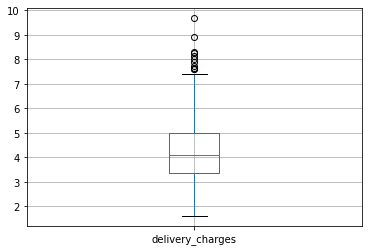

In [90]:
outliers.boxplot(column = 'delivery_charges')

Calculating the IQR, upper and lower fence values:

In [91]:
Q1 = outliers.delivery_charges.describe()['25%']
Q3 = outliers.delivery_charges.describe()['75%']
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

Q1, Q3, IQR, upper, lower

(3.3436250000000003, 4.988175, 1.6445499999999997, 7.455, 0.8768000000000007)

Looking at records having a delivery charge value above the upper fence value:

In [92]:
outliers[outliers.delivery_charges > 7.45]  #returns records with delivery_charge value greater than the upper fence

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
59,ORD084490,REST0057,CUST09381,COUR1768,-37.807090,144.959954,2020-07-26,18:55:23,1,1,Motorbike,"[('lassi', 3), ('cheese sandwich', 3), ('corn ...",20,119.344,814,2,8.01240,7.82
91,ORD105999,REST0732,CUST07297,COUR0879,-37.819663,144.952026,2020-12-05,02:30:19,0,1,Car,"[('coffee', 2), ('pasta', 1), ('burgers', 3), ...",20,62.848,6712,16,8.15640,6.97
116,ORD081856,REST0732,CUST09049,COUR0774,-37.811964,144.945641,2020-10-03,11:32:18,0,1,Bike,"[('waffles', 1), ('pasta', 2), ('salads', 2), ...",20,60.608,7013,35,7.59030,6.97
143,ORD081732,REST0732,CUST09423,COUR3063,-37.823525,144.956234,2020-04-23,19:54:43,1,0,Bike,"[('sandwiches', 1), ('waffles', 3), ('paneer b...",0,96.800,6564,33,7.66230,6.97
165,ORD084161,REST1136,CUST04481,COUR0865,-37.819078,144.973812,2020-09-12,18:59:20,1,1,Motorbike,"[('beer', 1), ('lunch buffet', 3), ('mango las...",45,51.062,2876,6,8.92785,9.39
189,ORD031697,REST0732,CUST13130,COUR3023,-37.815060,144.939276,2020-12-28,09:45:29,0,0,Bike,"[('pasta', 3), ('paneer burger', 1)]",20,21.224,7511,38,9.67905,6.97
197,ORD063174,REST0732,CUST04520,COUR2107,-37.816804,144.950658,2020-02-02,02:54:03,0,1,Bike,"[('coffee', 1), ('waffles', 1), ('burgers', 1)...",0,53.730,7049,35,7.74030,6.97
299,ORD212022,REST1634,CUST08760,COUR3348,-37.812740,145.013045,2020-09-23,12:27:41,1,0,Car,"[('ice tea', 1), ('supreme pizza', 1)]",20,22.888,3150,8,8.27175,6.64
327,ORD219936,REST0732,CUST06532,COUR0094,-37.824169,144.983700,2020-09-17,05:00:39,0,0,Bike,"[('pasta', 2), ('waffles', 1), ('coffee', 1), ...",10,56.025,4910,25,7.91115,6.97
375,ORD338787,REST1634,CUST05863,COUR2076,-37.806587,144.941482,2020-08-18,08:22:25,0,0,Bike,"[('farm pizza', 3), ('supreme pizza', 2), ('po...",0,64.640,4703,24,8.31825,6.64


These rows may not necessarily be outliers. But to know if they are or not, the following steps will help determine.

In my personal opinion, I think the other factors except for the '`restaurant_rating`' have much more impact on the '`delivery_charges`' attributes. However, the rating of the restaurant will be used to only to divide the dataframe into subsets for analysis of outliers.

Below are some boxplots depicting the distibution of the delivery charges values:

<Axes: title={'center': 'delivery_charges'}, xlabel='is_weekend'>

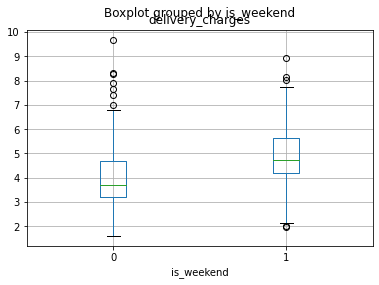

In [93]:
outliers.boxplot(column = 'delivery_charges', by = 'is_weekend')

<Axes: title={'center': 'delivery_charges'}, xlabel='is_peak_time'>

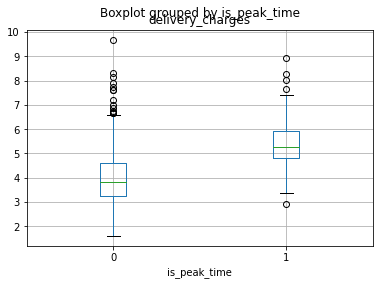

In [94]:
outliers.boxplot(column = 'delivery_charges', by = 'is_peak_time')

<Axes: title={'center': 'delivery_charges'}, xlabel='[is_peak_time, is_weekend]'>

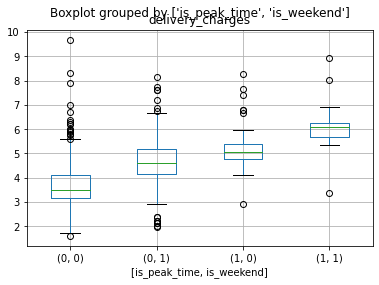

In [95]:
outliers.boxplot(column = 'delivery_charges', by = ['is_peak_time', 'is_weekend'])

From the boxplot above, it can be seen that the values differ slightly based on different combinations of the '`is_peak_time`' and '`is_weekend`' values.

The scatter plot below also suggests the same. Two other observations can also be made from these two plots:
 - As the travel time increases, the value for the delivery charge is also increasing.
 - Values for different combinations: **(no peak, no weekend) < (no peak, weekend) < (peak, no weekend) < (peak, weekend)**

<Axes: xlabel='travel_time_minutes', ylabel='delivery_charges'>

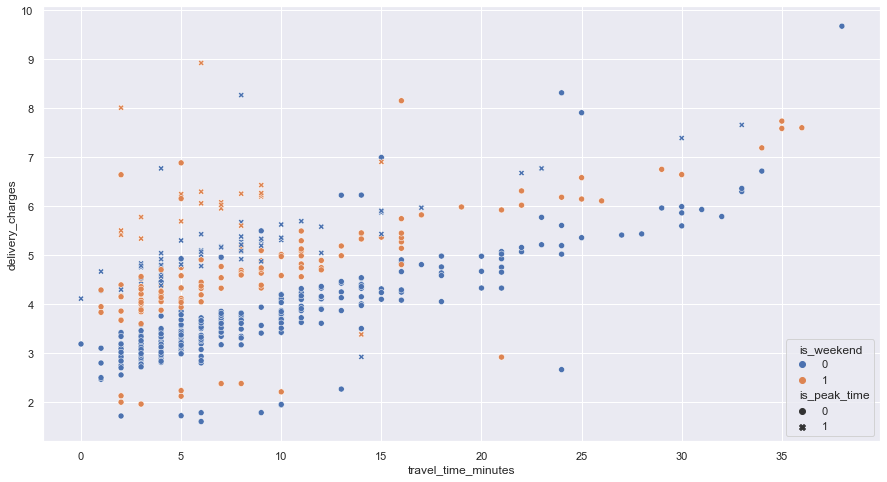

In [96]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = outliers, x = "travel_time_minutes", y = "delivery_charges", hue = "is_weekend", style = "is_peak_time")

Now, based on the ratings, the dataframe will be divided and examined for outliers. Combination of graphical methods like boxplots and scatter plots will be used as well as non-graphical methods, including percentiles, mean, IQR, upper and lower fence values will be used to detect outliers.
For each subset, different combination of values for the '`is_weekend`', '`is_peak_time`' columns will be used to determine outliers for them. But the actual dataframe will also be kept in mind when detecting outliers.
For instance, for a given combination of weekend and peak time values in a subset, if at all there is a point or there are points that do not belong to the more concentrated region but are classified as outliers, but the value looks okay on the scatter plot, they may not necessarily be considered as outliers.

For the first subset:

**REST1136**

In [97]:
#extracting the subset based on the rating
print(outliers[outliers.restaurant_rating == 9.39]['restaurant_id'][0])
df_1136 = outliers[outliers.restaurant_rating == 9.39]
#df_1136
df_1136_outliers = list()

REST1136


<Axes: title={'center': 'delivery_charges'}, xlabel='[is_weekend, is_peak_time]'>

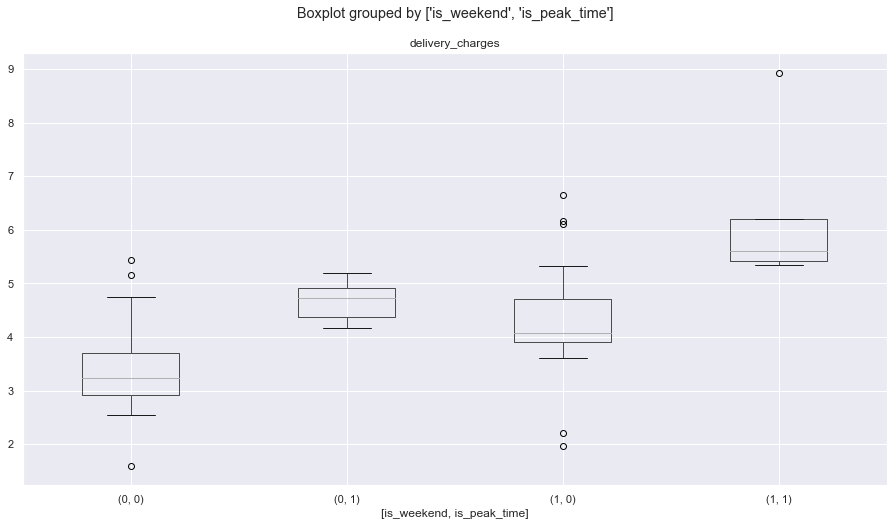

In [98]:
df_1136.boxplot(column = 'delivery_charges', by = ['is_weekend', 'is_peak_time'])

<Axes: xlabel='travel_time_minutes', ylabel='delivery_charges'>

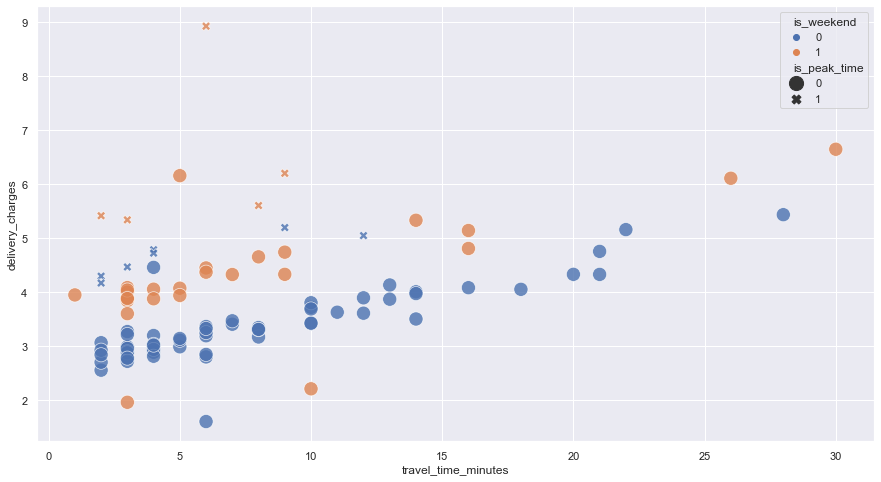

In [99]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = df_1136, x = "travel_time_minutes", y = "delivery_charges", hue = "is_weekend", style = "is_peak_time", size = "is_peak_time", alpha = 0.8, sizes = (80, 200))

The boxplot and scatter plot suggest that there are some outliers, let's look at these:

***weekend: 0, peak time: 0***

The basic stats are as follows:

In [100]:
df_1136[(df_1136.is_weekend == 0) & (df_1136.is_peak_time == 0)]['delivery_charges'].describe()

count    60.000000
mean      3.369045
std       0.652793
min       1.603150
25%       2.920300
50%       3.233850
75%       3.696975
max       5.435600
Name: delivery_charges, dtype: float64

In [101]:
Q1 = df_1136[(df_1136.is_weekend == 0) & (df_1136.is_peak_time == 0)].delivery_charges.describe()['25%']
Q3 = df_1136[(df_1136.is_weekend == 0) & (df_1136.is_peak_time == 0)].delivery_charges.describe()['75%']
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

Q1, Q3, IQR, upper, lower

(2.9203, 3.696975, 0.776675, 4.8619875, 1.7552875000000001)

In [102]:
#returns records that are considered outliers, according to the lower and upper fence values
df = df_1136[((df_1136.is_weekend == 0) & (df_1136.is_peak_time == 0)) & ((df_1136.delivery_charges > upper) | (df_1136.delivery_charges < lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
338,ORD032045,REST1136,CUST03024,COUR4192,-37.824579,144.969445,2020-07-17,17:16:29,0,0,Motorbike,"[('mango lassi', 2), ('palak pakoda', 1)]",0,27.210,2894,6,1.60315,9.39
414,ORD221014,REST1136,CUST11994,COUR0582,-37.816014,144.991954,2020-11-18,23:28:21,0,0,Bike,"[('salads', 2), ('palak pakoda', 1), ('lunch b...",0,58.390,4326,22,5.15890,9.39
401,ORD258093,REST1136,CUST10507,COUR0940,-37.799932,145.002521,2020-10-26,01:03:17,0,0,Bike,"[('thandai', 2), ('beer', 2), ('matka kulfi', 1)]",20,80.544,5571,28,5.43560,9.39


In [103]:
#returns records within the upper and lower fence values
df = df_1136[((df_1136.is_weekend == 0) & (df_1136.is_peak_time == 0)) & ((df_1136.delivery_charges <= upper) & (df_1136.delivery_charges >= lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
0,ORD282385,REST1136,CUST13479,COUR0478,-37.807197,144.945212,2020-11-27,16:44:50,0,0,Car,"[('palak pakoda', 2), ('salads', 3)]",20,40.280,810,2,2.55450,9.39
247,ORD087636,REST1136,CUST06130,COUR3390,-37.806500,144.956090,2020-04-22,23:40:13,0,0,Motorbike,"[('lunch buffet', 1), ('thandai', 1)]",0,38.560,998,2,2.92510,9.39
199,ORD245733,REST1136,CUST02122,COUR1509,-37.799173,144.952002,2020-10-23,01:54:43,0,0,Motorbike,"[('matka kulfi', 1), ('thandai', 1), ('palak p...",0,87.710,1116,2,2.70180,9.39
20,ORD172607,REST1136,CUST06060,COUR4981,-37.806192,144.941790,2020-01-07,21:17:48,0,0,Motorbike,"[('thandai', 2), ('palak pakoda', 1), ('lunch ...",20,105.320,1099,2,3.06350,9.39
349,ORD029166,REST1136,CUST07049,COUR4144,-37.801930,144.957293,2020-11-06,15:49:27,0,0,Motorbike,"[('thandai', 2), ('palak pakoda', 3)]",40,57.378,1091,2,2.84040,9.39
236,ORD277878,REST1136,CUST06312,COUR4963,-37.806327,144.956090,2020-05-12,17:04:36,0,0,Bike,"[('beer', 2), ('thandai', 2), ('matka kulfi', ...",10,131.796,606,3,2.78230,9.39
32,ORD335327,REST1136,CUST01484,COUR4061,-37.799375,144.960239,2020-07-16,00:23:44,0,0,Motorbike,"[('mango lassi', 2), ('beer', 3)]",20,54.704,1701,3,2.90590,9.39
376,ORD316710,REST1136,CUST05542,COUR3435,-37.819508,144.958246,2020-08-10,22:56:42,0,0,Motorbike,"[('salads', 2), ('thandai', 3), ('matka kulfi'...",45,97.642,1493,3,2.71860,9.39
233,ORD170870,REST1136,CUST12340,COUR0633,-37.811342,144.965670,2020-10-16,22:21:05,0,0,Motorbike,"[('thandai', 1), ('salads', 3), ('lunch buffet...",45,50.672,1635,3,3.21630,9.39
57,ORD031545,REST1136,CUST05371,COUR1717,-37.811115,144.966436,2020-04-14,03:17:48,0,0,Motorbike,"[('thandai', 2), ('matka kulfi', 1), ('salads'...",10,61.515,1708,3,2.97670,9.39


The values within the upper and lower fences look okay. They also seem to be increasing as the travel time increases. But amongst the rows that are considered as outliers,
only the row with index 338 seems strange, hence this is added to the outliers list (below). The other two rows, when verified with the scatter plot look fine. Since most of the values are concentrated within 10 minutes of travel time, they were taken to be outliers.

In [104]:
df_1136_outliers.append(338)
df_1136_outliers

[338]

***weekend: 0, peak time: 1***
        
Basic statistics:

In [105]:
df_1136[(df_1136.is_weekend == 0) & (df_1136.is_peak_time == 1)]['delivery_charges'].describe()

count    7.000000
mean     4.669529
std      0.380440
min      4.169300
25%      4.381600
50%      4.723500
75%      4.916850
max      5.197000
Name: delivery_charges, dtype: float64

In [106]:
Q1 = df_1136[(df_1136.is_weekend == 0) & (df_1136.is_peak_time == 1)].delivery_charges.describe()['25%']
Q3 = df_1136[(df_1136.is_weekend == 0) & (df_1136.is_peak_time == 1)].delivery_charges.describe()['75%']
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

Q1, Q3, IQR, upper, lower

(4.3816, 4.91685, 0.5352500000000004, 5.719725, 3.578724999999999)

In [107]:
#returns records that are considered outliers, according to the lower and upper fence values
df = df_1136[((df_1136.is_weekend == 0) & (df_1136.is_peak_time == 1)) & ((df_1136.delivery_charges > upper) | (df_1136.delivery_charges < lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating


There seem to be no outliers. The scatter plot looks okay too.

***weekend: 1, peak time: 0***

Basic stats:

In [108]:
df_1136[(df_1136.is_weekend == 1) & (df_1136.is_peak_time == 0)]['delivery_charges'].describe()

count    26.000000
mean      4.326252
std       1.024440
min       1.960000
25%       3.904225
50%       4.078750
75%       4.719475
max       6.647900
Name: delivery_charges, dtype: float64

In [109]:
Q1 = df_1136[(df_1136.is_weekend == 1) & (df_1136.is_peak_time == 0)].delivery_charges.describe()['25%']
Q3 = df_1136[(df_1136.is_weekend == 1) & (df_1136.is_peak_time == 0)].delivery_charges.describe()['75%']
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

Q1, Q3, IQR, upper, lower

(3.904225, 4.719475, 0.8152500000000003, 5.94235, 2.6813499999999992)

In [110]:
#returns records that are considered outliers, according to the lower and upper fence values
df = df_1136[((df_1136.is_weekend == 1) & (df_1136.is_peak_time == 0)) & ((df_1136.delivery_charges > upper) | (df_1136.delivery_charges < lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
440,ORD149722,REST1136,CUST05622,COUR1393,-37.812917,144.939215,2020-06-07,01:23:04,0,1,Car,"[('mango lassi', 1), ('thandai', 1)]",20,23.136,1361,3,1.96000,9.39
442,ORD216970,REST1136,CUST08689,COUR0663,-37.805147,144.960053,2020-11-14,05:00:39,0,1,Bike,"[('mango lassi', 2), ('beer', 1), ('palak pako...",45,35.310,1059,5,6.15840,9.39
276,ORD006009,REST1136,CUST06723,COUR3868,-37.807071,144.971266,2020-04-11,20:38:14,0,1,Bike,"[('beer', 2), ('lunch buffet', 2), ('mango las...",20,63.584,1954,10,2.20965,9.39
225,ORD262232,REST1136,CUST08089,COUR2573,-37.818727,145.001466,2020-04-12,09:25:42,0,1,Bike,"[('mango lassi', 2), ('matka kulfi', 2)]",0,42.000,5216,26,6.11050,9.39
395,ORD082165,REST1136,CUST03960,COUR4251,-37.798366,145.001464,2020-10-11,23:04:36,0,1,Bike,"[('palak pakoda', 2), ('beer', 2)]",20,56.624,5979,30,6.64790,9.39


In [111]:
#returns records within the upper and lower fence values
df = df_1136[((df_1136.is_weekend == 1) & (df_1136.is_peak_time == 0)) & ((df_1136.delivery_charges <= upper) & (df_1136.delivery_charges >= lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
399,ORD008459,REST1136,CUST10803,COUR3413,-37.808660,144.956616,2020-01-18,03:29:40,0,1,Car,"[('beer', 3), ('matka kulfi', 1)]",0,72.940,559,1,3.9487,9.39
251,ORD224619,REST1136,CUST02144,COUR3202,-37.804383,144.950366,2020-11-15,11:40:13,0,1,Bike,"[('mango lassi', 1), ('salads', 3)]",45,12.832,549,3,3.8926,9.39
397,ORD318469,REST1136,CUST00822,COUR3399,-37.816483,144.959188,2020-09-06,02:34:17,0,1,Motorbike,"[('matka kulfi', 1), ('lunch buffet', 3)]",0,60.880,1253,3,3.6018,9.39
378,ORD119429,REST1136,CUST08729,COUR0810,-37.799679,144.954943,2020-06-13,14:46:09,0,1,Car,"[('thandai', 1), ('beer', 3), ('lunch buffet',...",40,57.588,1068,3,4.0391,9.39
472,ORD046222,REST1136,CUST08426,COUR3948,-37.804521,144.963240,2020-12-05,00:55:23,0,1,Car,"[('mango lassi', 2), ('salads', 1)]",20,13.528,1431,3,3.8817,9.39
107,ORD066418,REST1136,CUST03900,COUR1209,-37.817843,144.946940,2020-02-15,09:41:32,0,1,Motorbike,"[('beer', 3), ('thandai', 2), ('matka kulfi', ...",20,156.976,1595,3,3.8457,9.39
105,ORD332147,REST1136,CUST06392,COUR4616,-37.816425,144.945871,2020-03-07,00:27:41,0,1,Car,"[('thandai', 2), ('palak pakoda', 3), ('lunch ...",0,125.870,1413,3,4.0016,9.39
30,ORD161108,REST1136,CUST08251,COUR0726,-37.820598,144.957245,2020-02-23,08:34:17,0,1,Motorbike,"[('beer', 2), ('thandai', 1)]",45,33.946,1598,3,4.0843,9.39
204,ORD334220,REST1136,CUST08406,COUR3707,-37.798776,144.964197,2020-08-15,11:24:23,0,1,Motorbike,"[('palak pakoda', 1), ('mango lassi', 3), ('be...",0,105.630,1994,4,3.8774,9.39
29,ORD143502,REST1136,CUST05771,COUR2843,-37.811805,144.944411,2020-10-24,10:13:11,0,1,Motorbike,"[('palak pakoda', 1), ('matka kulfi', 2), ('th...",0,109.290,2118,4,4.0551,9.39


For this combination, the scatter plot suggests that there are three points/rows with extreme values in comparison to the others, hence these have been added to the outliers list.

In [112]:
df_1136_outliers.extend([440, 442, 276])
df_1136_outliers

[338, 440, 442, 276]

***weekend: 1, peak time: 1***
        
Statistics checking:

In [113]:
df_1136[(df_1136.is_weekend == 1) & (df_1136.is_peak_time == 1)]['delivery_charges'].describe()

count    5.000000
mean     6.298250
std      1.508346
min      5.339800
25%      5.416400
50%      5.605400
75%      6.201800
max      8.927850
Name: delivery_charges, dtype: float64

In [114]:
Q1 = df_1136[(df_1136.is_weekend == 1) & (df_1136.is_peak_time == 1)].delivery_charges.describe()['25%']
Q3 = df_1136[(df_1136.is_weekend == 1) & (df_1136.is_peak_time == 1)].delivery_charges.describe()['75%']
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

Q1, Q3, IQR, upper, lower

(5.4164, 6.2018, 0.7854000000000001, 7.379900000000001, 4.238300000000001)

In [115]:
#returns records that are considered outliers, according to the lower and upper fence values
df = df_1136[((df_1136.is_weekend == 1) & (df_1136.is_peak_time == 1)) & ((df_1136.delivery_charges > upper) | (df_1136.delivery_charges < lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
165,ORD084161,REST1136,CUST04481,COUR0865,-37.819078,144.973812,2020-09-12,18:59:20,1,1,Motorbike,"[('beer', 1), ('lunch buffet', 3), ('mango las...",45,51.062,2876,6,8.92785,9.39


In [116]:
#returns records within the upper and lower fence values
df = df_1136[((df_1136.is_weekend == 1) & (df_1136.is_peak_time == 1)) & ((df_1136.delivery_charges <= upper) & (df_1136.delivery_charges >= lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
110,ORD212054,REST1136,CUST06042,COUR2339,-37.807952,144.945944,2020-04-25,12:39:33,1,1,Car,"[('matka kulfi', 1), ('salads', 2), ('beer', 2)]",20,52.560,678,2,5.4164,9.39
100,ORD345573,REST1136,CUST12461,COUR0347,-37.818880,144.953075,2020-07-11,18:27:41,1,1,Motorbike,"[('mango lassi', 1), ('matka kulfi', 1)]",0,21.000,1448,3,5.3398,9.39
86,ORD091450,REST1136,CUST03891,COUR3186,-37.818109,144.946929,2020-09-13,18:11:52,1,1,Bike,"[('thandai', 3), ('mango lassi', 1), ('salads'...",10,73.575,1630,8,5.6054,9.39
68,ORD155897,REST1136,CUST02375,COUR0281,-37.822332,144.955342,2020-03-07,13:27:01,1,1,Bike,"[('mango lassi', 2), ('salads', 3)]",0,28.810,1867,9,6.2018,9.39


This value (row 165) is an extreme. The value of delivery charge for records with greater time travel is lesser too.

In [117]:
df_1136_outliers.append(165)
df_1136_outliers

[338, 440, 442, 276, 165]

**REST0337**

Looking at the second subset now:

In [118]:
#extracting the subset based on the rating
print(outliers[outliers.restaurant_rating == 7.88]['restaurant_id'][6])
df_0337 = outliers[outliers.restaurant_rating == 7.88]
#df_0337
df_0337_outliers = list()

REST0337


<Axes: title={'center': 'delivery_charges'}, xlabel='[is_weekend, is_peak_time]'>

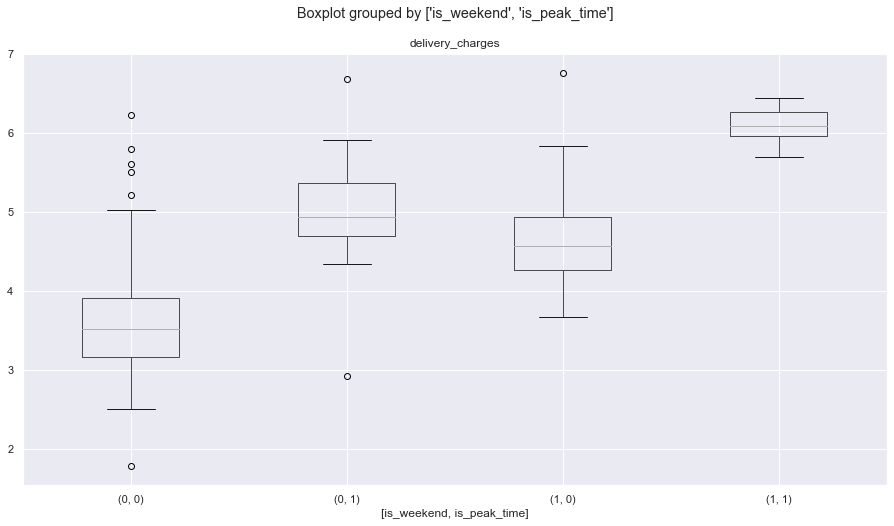

In [119]:
df_0337.boxplot(column = 'delivery_charges', by = ['is_weekend', 'is_peak_time'])

<Axes: xlabel='travel_time_minutes', ylabel='delivery_charges'>

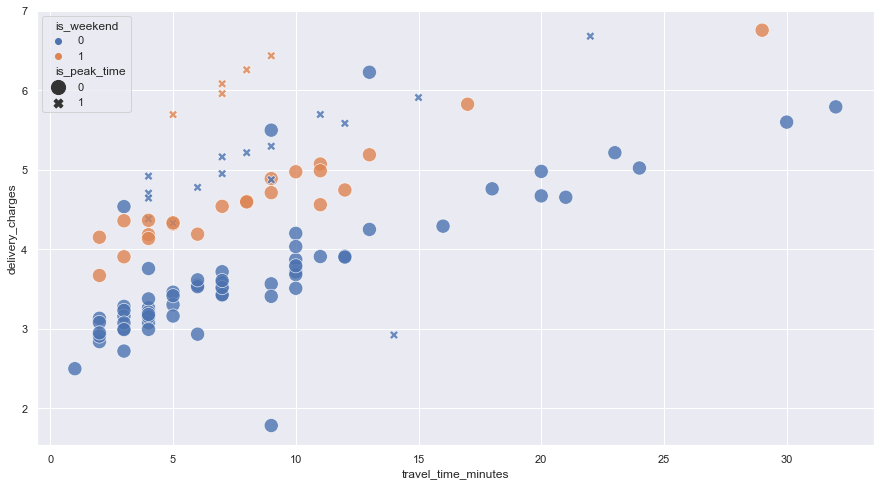

In [120]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = df_0337, x = "travel_time_minutes", y = "delivery_charges", hue = "is_weekend", style = "is_peak_time", size = "is_peak_time", alpha = 0.8, sizes = (80, 200))

The plots suggest existence of some outliers, let's look at them.

***weekend: 0, peak time: 0***

Looking at some basic statistics:

In [121]:
df_0337[(df_0337.is_weekend == 0) & (df_0337.is_peak_time == 0)]['delivery_charges'].describe()

count    64.000000
mean      3.693344
std       0.824356
min       1.785150
25%       3.157550
50%       3.517800
75%       3.910450
max       6.226350
Name: delivery_charges, dtype: float64

In [122]:
Q1 = df_0337[(df_0337.is_weekend == 0) & (df_0337.is_peak_time == 0)].delivery_charges.describe()['25%']
Q3 = df_0337[(df_0337.is_weekend == 0) & (df_0337.is_peak_time == 0)].delivery_charges.describe()['75%']
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

Q1, Q3, IQR, upper, lower

(3.15755, 3.91045, 0.7528999999999999, 5.0398, 2.0282)

In [123]:
#returns records that are considered outliers, according to the lower and upper fence values
df = df_0337[((df_0337.is_weekend == 0) & (df_0337.is_peak_time == 0)) & ((df_0337.delivery_charges > upper) | (df_0337.delivery_charges < lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
23,ORD105595,REST0337,CUST02811,COUR4014,-37.810203,144.993795,2020-01-24,11:04:36,0,0,Motorbike,"[('fish finger', 2), ('fish curry', 2), ('beng...",0,82.040,4476,9,5.49825,7.88
446,ORD310923,REST0337,CUST09713,COUR2430,-37.805144,144.987969,2020-01-29,17:00:39,0,0,Motorbike,"[('fish cutlet', 3), ('chicken curry', 3), ('b...",20,83.936,4263,9,1.78515,7.88
445,ORD097079,REST0337,CUST01662,COUR2024,-37.815402,145.012625,2020-06-08,01:15:09,0,0,Motorbike,"[('alur dom', 2), ('bhetki paturi', 2)]",45,17.138,6544,13,6.22635,7.88
48,ORD261000,REST0337,CUST02969,COUR3133,-37.799313,144.987767,2020-08-31,05:28:21,0,0,Bike,"[('fish curry', 2), ('chicken curry', 3), ('bh...",0,84.480,4649,23,5.21470,7.88
98,ORD326460,REST0337,CUST08174,COUR4808,-37.816796,145.007268,2020-04-29,20:22:25,0,0,Bike,"[('chicken curry', 1), ('bhetki paturi', 2), (...",10,47.826,5902,30,5.59940,7.88
36,ORD240610,REST0337,CUST01110,COUR2256,-37.810443,145.010884,2020-05-01,17:44:10,0,0,Bike,"[('bhetki paturi', 3), ('fish curry', 2), ('be...",20,55.984,6398,32,5.79090,7.88


In [124]:
#returns records within the upper and lower fence values
df = df_0337[((df_0337.is_weekend == 0) & (df_0337.is_peak_time == 0)) & ((df_0337.delivery_charges <= upper) & (df_0337.delivery_charges >= lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
309,ORD298997,REST0337,CUST03894,COUR4409,-37.818008,144.947204,2020-04-10,15:57:21,0,0,Motorbike,"[('alur dom', 1), ('aloo posto', 2)]",0,23.160,510,1,2.49950,7.88
135,ORD108277,REST0337,CUST03762,COUR0969,-37.819655,144.952560,2020-11-06,10:13:11,0,0,Motorbike,"[('fish finger', 3), ('bhetki paturi', 3), ('c...",0,86.570,793,2,2.83950,7.88
66,ORD348302,REST0337,CUST13689,COUR1932,-37.818643,144.955332,2020-05-19,11:20:26,0,0,Car,"[('dhokar dalna', 1), ('fish finger', 2), ('fi...",0,71.980,977,2,3.13350,7.88
230,ORD164392,REST0337,CUST12908,COUR3366,-37.812094,144.954211,2020-04-08,15:17:48,0,0,Car,"[('fish cutlet', 2), ('aloo posto', 2), ('alur...",40,38.988,839,2,2.94950,7.88
214,ORD259609,REST0337,CUST07297,COUR4348,-37.819663,144.952026,2020-06-02,06:43:30,0,0,Motorbike,"[('chicken dak bunglow', 1), ('dhokar dalna', ...",40,69.444,806,2,2.90980,7.88
176,ORD319067,REST0337,CUST11096,COUR0471,-37.809025,144.946910,2020-01-15,17:16:29,0,0,Car,"[('chicken curry', 2), ('fish finger', 3), ('b...",0,106.150,930,2,3.08100,7.88
493,ORD272338,REST0337,CUST11364,COUR3708,-37.817754,144.959101,2020-03-19,06:47:28,0,0,Car,"[('alur dom', 2), ('chicken curry', 1), ('fish...",0,97.300,1333,3,2.99110,7.88
488,ORD303493,REST0337,CUST10552,COUR0883,-37.824645,144.944556,2020-01-08,07:42:51,0,0,Motorbike,"[('fish cutlet', 2), ('bhetki paturi', 1), ('a...",0,46.030,1540,3,2.72100,7.88
41,ORD202405,REST0337,CUST06852,COUR3333,-37.805899,144.955999,2020-01-07,22:25:03,0,0,Motorbike,"[('bhetki paturi', 2), ('alur dom', 2)]",0,31.160,1592,3,3.28300,7.88
43,ORD074250,REST0337,CUST04432,COUR2584,-37.824480,144.943491,2020-08-14,10:01:19,0,0,Motorbike,"[('fish cutlet', 3), ('bhetki paturi', 1)]",0,55.360,1579,3,3.15930,7.88


For rows with indices 23, 445, 446 the values are different compared to those values that have the same travel time as well as those that are closer. Hence, these have been added to the outliers list.
Coming to the others that are considered outliers, in the scatter plot, they look alright. Moreover, very few records exist after 20 minutes and 30 minutes travel time periods, and so that is probably the cause for them to be considered as outliers.

In [125]:
df_0337_outliers.extend([23, 446, 445])
df_0337_outliers

[23, 446, 445]

***weekend: 0, peak time: 1***
    
Let's look at some basic statistics:

In [126]:
df_0337[(df_0337.is_weekend == 0) & (df_0337.is_peak_time == 1)]['delivery_charges'].describe()

count    16.000000
mean      5.003384
std       0.818831
min       2.923250
25%       4.690925
50%       4.935900
75%       5.367775
max       6.679300
Name: delivery_charges, dtype: float64

In [127]:
Q1 = df_0337[(df_0337.is_weekend == 0) & (df_0337.is_peak_time == 1)].delivery_charges.describe()['25%']
Q3 = df_0337[(df_0337.is_weekend == 0) & (df_0337.is_peak_time == 1)].delivery_charges.describe()['75%']
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

Q1, Q3, IQR, upper, lower

(4.690925, 5.367775, 0.67685, 6.38305, 3.67565)

In [128]:
#returns records that are considered outliers, according to the lower and upper fence values
df = df_0337[((df_0337.is_weekend == 0) & (df_0337.is_peak_time == 1)) & ((df_0337.delivery_charges > upper) | (df_0337.delivery_charges < lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
146,ORD337975,REST0337,CUST11479,COUR0962,-37.800357,145.001244,2020-09-24,19:46:48,1,0,Car,"[('fish cutlet', 2), ('chicken curry', 2)]",10,59.112,5827,14,2.92325,7.88
229,ORD050380,REST0337,CUST02853,COUR3382,-37.821277,144.991835,2020-07-07,18:35:36,1,0,Bike,"[('aloo posto', 3), ('fish cutlet', 2), ('dhok...",20,139.704,4457,22,6.67930,7.88


In [129]:
#returns records within the upper and lower fence values
df = df_0337[((df_0337.is_weekend == 0) & (df_0337.is_peak_time == 1)) & ((df_0337.delivery_charges <= upper) & (df_0337.delivery_charges >= lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
77,ORD329046,REST0337,CUST08374,COUR1774,-37.812422,144.953970,2020-09-04,12:23:44,1,0,Bike,"[('bengali pulao', 1), ('fish finger', 2), ('f...",20,43.760,791,4,4.7065,7.88
104,ORD114442,REST0337,CUST01389,COUR0043,-37.810760,144.964816,2020-09-24,19:50:46,1,0,Motorbike,"[('fish finger', 2), ('aloo posto', 1), ('chic...",0,92.640,1871,4,4.3835,7.88
350,ORD208221,REST0337,CUST07033,COUR3356,-37.803992,144.958461,2020-10-23,12:43:30,1,0,Motorbike,"[('bengali pulao', 1), ('bhetki paturi', 2)]",0,19.340,2019,4,4.6442,7.88
380,ORD222697,REST0337,CUST12819,COUR4063,-37.820789,144.962103,2020-01-10,12:23:44,1,0,Motorbike,"[('bhetki paturi', 2), ('fish cutlet', 2)]",0,45.440,2078,4,4.9205,7.88
345,ORD349576,REST0337,CUST07777,COUR3105,-37.814136,144.965729,2020-02-10,19:11:12,1,0,Car,"[('bhetki paturi', 2), ('bengali pulao', 2)]",0,25.880,1884,5,4.3305,7.88
489,ORD344997,REST0337,CUST12759,COUR3418,-37.816953,144.927474,2020-05-26,18:27:41,1,0,Car,"[('dhokar dalna', 1), ('alur dom', 3), ('fish ...",20,108.600,2584,6,4.7788,7.88
26,ORD121079,REST0337,CUST05815,COUR0647,-37.814151,144.977532,2020-04-10,19:54:43,1,0,Car,"[('fish cutlet', 1), ('dhokar dalna', 3), ('be...",0,125.760,3107,7,4.9513,7.88
419,ORD227223,REST0337,CUST00005,COUR0999,-37.820560,144.981360,2020-09-22,18:07:54,1,0,Motorbike,"[('bhetki paturi', 2), ('chicken curry', 3)]",45,34.298,3369,7,5.1625,7.88
388,ORD316231,REST0337,CUST12633,COUR2487,-37.803607,144.949031,2020-02-21,13:46:48,1,0,Bike,"[('bhetki paturi', 3), ('fish cutlet', 3), ('a...",45,71.610,1685,8,5.2150,7.88
45,ORD292994,REST0337,CUST04884,COUR3601,-37.822219,144.983217,2020-01-07,13:27:01,1,0,Car,"[('dhokar dalna', 3), ('fish finger', 1), ('fi...",10,105.237,3749,9,5.2958,7.88


Row with index 146 is an outlier. Looking at the values for this combination of weekend and peak time values, the least travel time is 4 minutes, whose associated delivery charge value is 4.7 approximately. This outlier row has a value of 2.9 associated with it for delivery charge, which seems to be really low, given the travel time is 14 minutes.
Delivery charge of row with index 229 seems normal and is the only value that is above 20 minutes, probably that is why it was considered an outlier as per the lower and upper fences.

In [130]:
df_0337_outliers.append(146)
df_0337_outliers

[23, 446, 445, 146]

***weekend: 1, peak time: 0***
        
Statistics for this combination of the dataframe:

In [131]:
df_0337[(df_0337.is_weekend == 1) & (df_0337.is_peak_time == 0)]['delivery_charges'].describe()

count    23.000000
mean      4.655313
std       0.654283
min       3.671500
25%       4.255500
50%       4.561200
75%       4.932350
max       6.754900
Name: delivery_charges, dtype: float64

In [132]:
Q1 = df_0337[(df_0337.is_weekend == 1) & (df_0337.is_peak_time == 0)].delivery_charges.describe()['25%']
Q3 = df_0337[(df_0337.is_weekend == 1) & (df_0337.is_peak_time == 0)].delivery_charges.describe()['75%']
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

Q1, Q3, IQR, upper, lower

(4.2555, 4.93235, 0.67685, 5.9476249999999995, 3.2402249999999997)

In [133]:
#returns records that are considered outliers, according to the lower and upper fence values
df = df_0337[((df_0337.is_weekend == 1) & (df_0337.is_peak_time == 0)) & ((df_0337.delivery_charges > upper) | (df_0337.delivery_charges < lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
255,ORD064076,REST0337,CUST09651,COUR1415,-37.803134,145.003551,2020-09-27,15:13:50,0,1,Bike,"[('aloo posto', 1), ('fish finger', 2), ('chic...",45,67.7,5812,29,6.7549,7.88


In [134]:
#returns records within the upper and lower fence values
df = df_0337[((df_0337.is_weekend == 1) & (df_0337.is_peak_time == 0)) & ((df_0337.delivery_charges <= upper) & (df_0337.delivery_charges >= lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
495,ORD035766,REST0337,CUST12506,COUR2011,-37.818995,144.953089,2020-01-25,06:43:30,0,1,Car,"[('chicken curry', 2), ('bengali pulao', 3), (...",0,61.840,833,2,4.1520,7.88
144,ORD242300,REST0337,CUST07646,COUR4039,-37.813922,144.940449,2020-09-13,08:26:22,0,1,Car,"[('chicken dak bunglow', 2), ('bhetki paturi',...",20,94.128,786,2,3.6715,7.88
411,ORD101334,REST0337,CUST08297,COUR1144,-37.821115,144.954886,2020-09-27,03:57:21,0,1,Car,"[('alur dom', 1), ('chicken dak bunglow', 1)]",0,26.430,1087,3,3.9064,7.88
347,ORD055189,REST0337,CUST11047,COUR0924,-37.807809,144.952481,2020-07-04,09:45:29,0,1,Car,"[('chicken curry', 1), ('alur dom', 3)]",40,26.436,1284,3,4.3591,7.88
149,ORD253741,REST0337,CUST05781,COUR4549,-37.809562,144.939179,2020-11-08,08:10:32,0,1,Car,"[('fish curry', 3), ('fish finger', 3), ('aloo...",20,108.096,1602,4,4.1840,7.88
439,ORD178514,REST0337,CUST06329,COUR0471,-37.806152,144.957238,2020-09-27,10:36:55,0,1,Car,"[('bhetki paturi', 3), ('chicken curry', 3)]",0,68.760,1784,4,4.3651,7.88
427,ORD236325,REST0337,CUST01743,COUR3964,-37.815450,144.941596,2020-12-13,11:32:18,0,1,Bike,"[('chicken dak bunglow', 2), ('chicken curry',...",10,123.831,747,4,4.1367,7.88
132,ORD072843,REST0337,CUST02262,COUR1865,-37.818618,144.967008,2020-06-06,06:11:52,0,1,Car,"[('chicken dak bunglow', 2), ('bhetki paturi',...",0,118.760,2022,5,4.3201,7.88
470,ORD012466,REST0337,CUST12714,COUR2502,-37.812439,144.973491,2020-05-03,21:41:32,0,1,Motorbike,"[('alur dom', 2), ('aloo posto', 3)]",0,39.330,2636,5,4.3333,7.88
168,ORD294114,REST0337,CUST01495,COUR2313,-37.817331,144.968816,2020-03-29,02:42:11,0,1,Car,"[('bengali pulao', 2), ('fish curry', 2), ('bh...",10,54.720,2550,6,4.1909,7.88


Since it's far away in terms of travel time and being the only point after 20 minutes, as per the upper and lower fences the row with index 255 was taken as an outlier.
The point looks alright on the scatter plot though. Hence, it is not being added to the outlier list.

***weekend: 1, peak time: 1***

Statistics:

In [135]:
df_0337[(df_0337.is_weekend == 1) & (df_0337.is_peak_time == 1)]['delivery_charges'].describe()

count    5.000000
mean     6.084500
std      0.282914
min      5.693800
25%      5.957400
50%      6.081200
75%      6.256800
max      6.433300
Name: delivery_charges, dtype: float64

In [136]:
Q1 = df_0337[(df_0337.is_weekend == 1) & (df_0337.is_peak_time == 1)].delivery_charges.describe()['25%']
Q3 = df_0337[(df_0337.is_weekend == 1) & (df_0337.is_peak_time == 1)].delivery_charges.describe()['75%']
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

Q1, Q3, IQR, upper, lower

(5.9574, 6.2568, 0.29940000000000033, 6.705900000000001, 5.508299999999999)

In [137]:
#returns records that are considered outliers, according to the lower and upper fence values
df = df_0337[((df_0337.is_weekend == 1) & (df_0337.is_peak_time == 1)) & ((df_0337.delivery_charges > upper) | (df_0337.delivery_charges < lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating


There seem to be outliers (both from above and the scatter plot).

In [138]:
df_0337_outliers

[23, 446, 445, 146]

**REST0057**

Next subset of the dataframe:

In [139]:
#extracting the subset based on the rating
print(outliers[outliers.restaurant_rating == 7.82]['restaurant_id'][9])
df_0057 = outliers[outliers.restaurant_rating == 7.82]
#df_0057
df_0057_outliers = list()

REST0057


<Axes: title={'center': 'delivery_charges'}, xlabel='[is_weekend, is_peak_time]'>

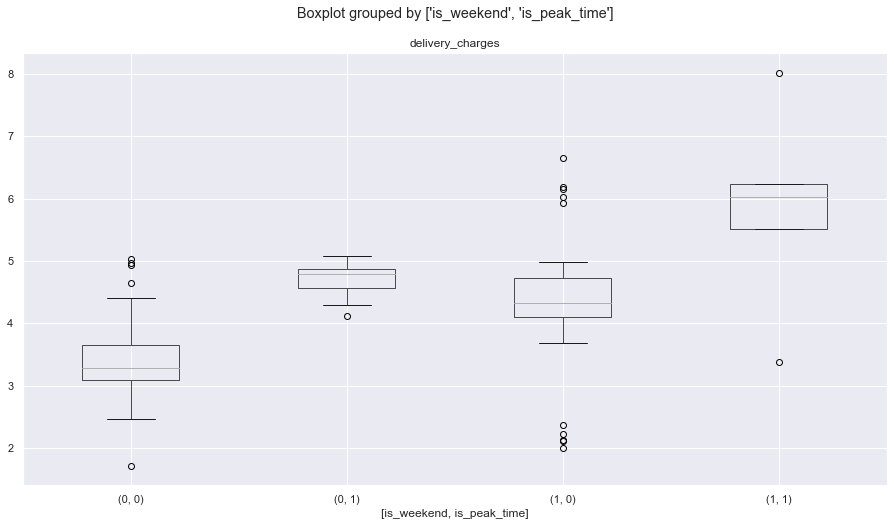

In [140]:
df_0057.boxplot(column = 'delivery_charges', by = ['is_weekend', 'is_peak_time'])

<Axes: xlabel='travel_time_minutes', ylabel='delivery_charges'>

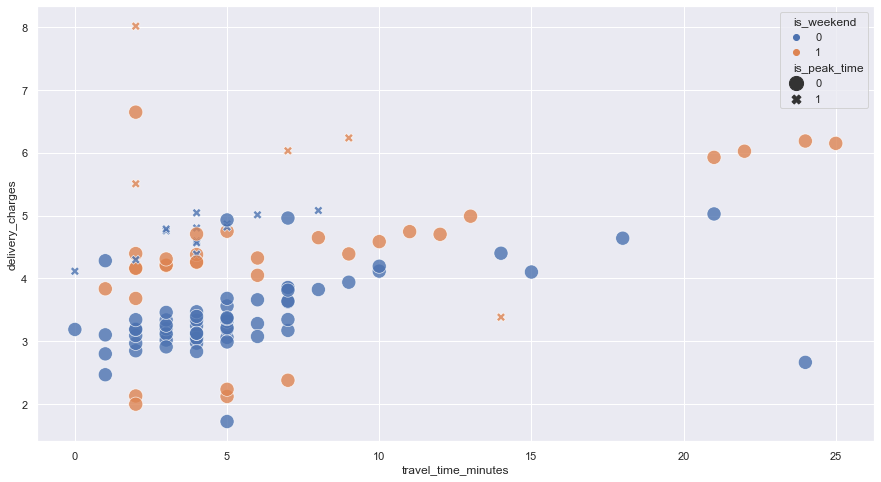

In [141]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = df_0057, x = "travel_time_minutes", y = "delivery_charges", hue = "is_weekend", style = "is_peak_time", size = "is_peak_time", alpha = 0.8, sizes = (80, 200))

Both the plots suggest the presence of outliers, which will be verified below:
    
***weekend: 0, peak time: 0***
        
Some stats include:

In [142]:
df_0057[(df_0057.is_weekend == 0) & (df_0057.is_peak_time == 0)]['delivery_charges'].describe()

count    61.000000
mean      3.415343
std       0.594195
min       1.721900
25%       3.087100
50%       3.280800
75%       3.659100
max       5.024900
Name: delivery_charges, dtype: float64

In [143]:
Q1 = df_0057[(df_0057.is_weekend == 0) & (df_0057.is_peak_time == 0)].delivery_charges.describe()['25%']
Q3 = df_0057[(df_0057.is_weekend == 0) & (df_0057.is_peak_time == 0)].delivery_charges.describe()['75%']
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

Q1, Q3, IQR, upper, lower

(3.0871, 3.6591, 0.5720000000000001, 4.5171, 2.2291)

In [144]:
#returns records that are considered outliers, according to the lower and upper fence values
df = df_0057[((df_0057.is_weekend == 0) & (df_0057.is_peak_time == 0)) & ((df_0057.delivery_charges > upper) | (df_0057.delivery_charges < lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
287,ORD066259,REST0057,CUST03599,COUR0412,-37.824945,144.948758,2020-12-25,03:05:56,0,0,Motorbike,"[('lassi', 2), ('panipuri', 1), ('chaat', 1)]",0,57.66,2724,5,1.7219,7.82
497,ORD177392,REST0057,CUST09523,COUR3139,-37.809727,144.990035,2020-10-05,05:20:26,0,0,Motorbike,"[('lassi', 3), ('cheese sandwich', 1), ('panip...",0,165.94,2367,5,4.9296,7.82
182,ORD195354,REST0057,CUST08487,COUR2012,-37.801437,144.956787,2020-10-09,17:56:02,0,0,Bike,"[('chocolate sandwich', 3), ('lassi', 2), ('pa...",45,63.30,1460,7,4.9596,7.82
213,ORD157098,REST0057,CUST06423,COUR1026,-37.805458,145.000418,2020-11-17,08:26:22,0,0,Bike,"[('chaat', 2), ('chocolate sandwich', 2), ('ch...",0,76.56,3613,18,4.6390,7.82
421,ORD093125,REST0057,CUST09904,COUR0369,-37.808270,144.953593,2020-11-16,00:47:28,0,0,Bike,"[('chaat', 1), ('potato twister', 2), ('chocol...",0,68.88,4268,21,5.0249,7.82


In [145]:
#returns records within the upper and lower fence values
df = df_0057[((df_0057.is_weekend == 0) & (df_0057.is_peak_time == 0)) & ((df_0057.delivery_charges <= upper) & (df_0057.delivery_charges >= lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
215,ORD139748,REST0057,CUST01391,COUR4210,-37.810164,144.966819,2020-02-07,02:50:06,0,0,Car,"[('chocolate sandwiches', 3), ('chocolate sand...",0,112.890,137,0,3.18720,7.82
9,ORD221217,REST0057,CUST03152,COUR4502,-37.807004,144.969588,2020-06-18,05:12:31,0,0,Motorbike,"[('chocolate sandwich', 2), ('cheese sandwiche...",40,60.516,700,1,2.46640,7.82
167,ORD121091,REST0057,CUST01453,COUR0358,-37.813119,144.969428,2020-06-19,22:32:58,0,0,Motorbike,"[('lassi', 1), ('cheese sandwich', 1)]",0,20.790,621,1,4.28070,7.82
183,ORD258053,REST0057,CUST07767,COUR1913,-37.813705,144.965537,2020-06-26,05:16:29,0,0,Car,"[('chaat', 1), ('panipuri', 3), ('lassi', 3)]",0,103.400,621,1,2.79850,7.82
14,ORD048149,REST0057,CUST02657,COUR3790,-37.806056,144.967665,2020-12-04,09:41:32,0,0,Motorbike,"[('corn sandwich', 2), ('chocolate sandwich', 1)]",0,62.570,721,1,3.10130,7.82
61,ORD070418,REST0057,CUST08677,COUR0142,-37.803089,144.962084,2020-04-08,11:44:10,0,0,Motorbike,"[('corn sandwich', 2), ('panipuri', 1), ('chee...",10,84.591,1059,2,2.96570,7.82
415,ORD139131,REST0057,CUST00061,COUR2705,-37.803190,144.969587,2020-01-17,09:13:50,0,0,Motorbike,"[('panipuri', 3), ('cheese sandwiches', 2), ('...",10,124.299,1091,2,3.34220,7.82
316,ORD076942,REST0057,CUST00179,COUR0312,-37.810671,144.955908,2020-04-16,04:40:52,0,0,Motorbike,"[('chaat', 2), ('cheese sandwich', 3), ('chill...",20,50.024,1032,2,3.18690,7.82
289,ORD242151,REST0057,CUST11009,COUR4202,-37.803461,144.962384,2020-06-15,20:58:01,0,0,Car,"[('chocolate sandwiches', 2), ('corn sandwich'...",0,76.590,998,2,3.19600,7.82
232,ORD252831,REST0057,CUST05499,COUR2832,-37.815799,144.963695,2020-03-17,02:06:35,0,0,Motorbike,"[('chaat', 1), ('potato twister', 1), ('lassi'...",0,39.080,914,2,3.08950,7.82


The rows with indices 287, 497 and 182 are indeed outliers. The delivery charge values are not only extreme but also differ with respect to all the points with the same travel time and those closer to these as well.
Surprisingly, the row with index 97 was not included as an outlier as per the upper and lower fence values, but it is with respect to the scatter plot. The travel time values before it have larger and increasing delivery charge values as well.

In [146]:
df_0057_outliers.extend([287, 97, 497, 182])
df_0057_outliers

[287, 97, 497, 182]

***weekend: 0, peak time: 1***
        
Basic stats include:

In [147]:
df_0057[(df_0057.is_weekend == 0) & (df_0057.is_peak_time == 1)]['delivery_charges'].describe()

count    13.000000
mean      4.701077
std       0.296627
min       4.113300
25%       4.566300
50%       4.785500
75%       4.864000
max       5.079800
Name: delivery_charges, dtype: float64

In [148]:
Q1 = df_0057[(df_0057.is_weekend == 0) & (df_0057.is_peak_time == 1)].delivery_charges.describe()['25%']
Q3 = df_0057[(df_0057.is_weekend == 0) & (df_0057.is_peak_time == 1)].delivery_charges.describe()['75%']
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

Q1, Q3, IQR, upper, lower

(4.5663, 4.864, 0.29769999999999985, 5.310549999999999, 4.11975)

In [149]:
#returns records that are considered outliers, according to the lower and upper fence values
df = df_0057[((df_0057.is_weekend == 0) & (df_0057.is_peak_time == 1)) & ((df_0057.delivery_charges > upper) | (df_0057.delivery_charges < lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
194,ORD211452,REST0057,CUST01389,COUR4397,-37.81076,144.964816,2020-03-24,19:34:56,1,0,Car,"[('panipuri', 3), ('potato twister', 3), ('chi...",0,131.04,53,0,4.1133,7.82


In [150]:
#returns records within the upper and lower fence values
df = df_0057[((df_0057.is_weekend == 0) & (df_0057.is_peak_time == 1)) & ((df_0057.delivery_charges <= upper) & (df_0057.delivery_charges >= lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
298,ORD052872,REST0057,CUST02641,COUR1339,-37.809378,144.956482,2020-12-17,12:59:20,1,0,Motorbike,"[('lassi', 1), ('potato twister', 1), ('panipu...",10,65.610,996,2,4.2966,7.82
290,ORD295062,REST0057,CUST00064,COUR2510,-37.803057,144.969610,2020-05-01,12:03:57,1,0,Car,"[('chocolate sandwich', 1), ('panipuri', 2), (...",10,72.585,1107,3,4.7565,7.82
491,ORD305372,REST0057,CUST07002,COUR0461,-37.805931,144.955282,2020-04-02,13:27:01,1,0,Car,"[('chocolate sandwich', 1), ('chocolate sandwi...",10,52.983,1233,3,4.7855,7.82
180,ORD032879,REST0057,CUST10393,COUR0045,-37.822392,144.970133,2020-03-16,13:11:12,1,0,Car,"[('potato twister', 3), ('lassi', 3), ('chocol...",0,100.940,1549,4,4.5950,7.82
192,ORD253590,REST0057,CUST03874,COUR2764,-37.799272,144.977223,2020-09-03,19:19:07,1,0,Motorbike,"[('cheese sandwiches', 2), ('cheese sandwich',...",0,43.890,1977,4,4.8018,7.82
254,ORD249481,REST0057,CUST00485,COUR1622,-37.818903,144.947178,2020-06-26,13:54:43,1,0,Motorbike,"[('chilli cheese', 1), ('chaat', 3), ('cheese ...",0,62.150,2210,4,5.0432,7.82
357,ORD316296,REST0057,CUST04016,COUR3909,-37.806890,144.951218,2020-12-04,18:23:44,1,0,Car,"[('chilli cheese', 1), ('chocolate sandwich', ...",10,88.857,1699,4,4.5663,7.82
475,ORD282882,REST0057,CUST05530,COUR2959,-37.818380,144.961345,2020-02-14,19:11:12,1,0,Car,"[('cheese sandwich', 3), ('chilli cheese', 2)]",0,30.630,1459,4,4.3841,7.82
203,ORD115879,REST0057,CUST03017,COUR1602,-37.803485,144.965472,2020-09-04,18:39:33,1,0,Bike,"[('chocolate sandwich', 1), ('cheese sandwiche...",0,78.790,979,5,4.8640,7.82
361,ORD088416,REST0057,CUST02651,COUR1002,-37.808541,144.957883,2020-04-21,13:23:04,1,0,Bike,"[('corn sandwich', 2), ('chocolate sandwich', ...",40,60.906,966,5,4.8168,7.82


Row with index 194 is considered an outlier as per the upper, lower fence values but the scatter plot denies!

***weekend: 1, peak time: 0***
        
Let's look at the percentiles, IQR, fence values for this combination:

In [151]:
df_0057[(df_0057.is_weekend == 1) & (df_0057.is_peak_time == 0)]['delivery_charges'].describe()

count    31.000000
mean      4.307061
std       1.196361
min       1.998450
25%       4.104000
50%       4.323900
75%       4.724700
max       6.644550
Name: delivery_charges, dtype: float64

In [152]:
Q1 = df_0057[(df_0057.is_weekend == 1) & (df_0057.is_peak_time == 0)].delivery_charges.describe()['25%']
Q3 = df_0057[(df_0057.is_weekend == 1) & (df_0057.is_peak_time == 0)].delivery_charges.describe()['75%']
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

Q1, Q3, IQR, upper, lower

(4.104, 4.7247, 0.6207000000000003, 5.655750000000001, 3.1729499999999997)

In [153]:
#returns records that are considered outliers, according to the lower and upper fence values
df = df_0057[((df_0057.is_weekend == 1) & (df_0057.is_peak_time == 0)) & ((df_0057.delivery_charges > upper) | (df_0057.delivery_charges < lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
171,ORD116783,REST0057,CUST10932,COUR2898,-37.803234,144.966951,2020-02-29,21:17:48,0,1,Car,"[('cheese sandwiches', 1), ('panipuri', 2)]",0,42.220,995,2,2.12870,7.82
322,ORD167291,REST0057,CUST03157,COUR3809,-37.805640,144.973158,2020-06-14,15:29:40,0,1,Motorbike,"[('chilli cheese', 3), ('cheese sandwiches', 1)]",0,28.840,1053,2,6.64455,7.82
467,ORD236781,REST0057,CUST09292,COUR1214,-37.815624,144.958120,2020-12-06,02:06:35,0,1,Motorbike,"[('chaat', 2), ('panipuri', 2), ('chocolate sa...",0,139.390,1106,2,1.99845,7.82
115,ORD154204,REST0057,CUST04098,COUR2253,-37.818757,144.983192,2020-09-19,23:20:26,0,1,Motorbike,"[('lassi', 1), ('corn sandwich', 2), ('potato ...",0,121.360,2269,5,2.12105,7.82
341,ORD051515,REST0057,CUST03368,COUR3477,-37.824974,144.958918,2020-05-16,22:05:16,0,1,Motorbike,"[('chocolate sandwiches', 2), ('potato twister...",10,112.644,2347,5,2.23465,7.82
130,ORD319622,REST0057,CUST04265,COUR1923,-37.824462,144.988911,2020-04-05,02:10:32,0,1,Car,"[('cheese sandwich', 1), ('potato twister', 1)...",20,62.392,2873,7,2.37870,7.82
382,ORD276972,REST0057,CUST06406,COUR4892,-37.802345,145.004816,2020-05-31,20:14:30,0,1,Bike,"[('chaat', 3), ('corn sandwich', 2)]",0,85.120,4256,21,5.92540,7.82
449,ORD187933,REST0057,CUST02454,COUR1424,-37.800567,145.004459,2020-08-30,17:16:29,0,1,Bike,"[('potato twister', 2), ('lassi', 1), ('chocol...",20,47.120,4389,22,6.02290,7.82
218,ORD214731,REST0057,CUST01985,COUR0629,-37.800952,145.012094,2020-01-05,11:48:07,0,1,Bike,"[('potato twister', 2), ('lassi', 3)]",45,36.707,4793,24,6.18510,7.82
263,ORD135153,REST0057,CUST08062,COUR3884,-37.819973,145.016424,2020-02-15,01:11:12,0,1,Bike,"[('chaat', 3), ('chilli cheese', 2), ('chocola...",0,93.300,5035,25,6.14830,7.82


In [154]:
#returns records within the upper and lower fence values
df = df_0057[((df_0057.is_weekend == 1) & (df_0057.is_peak_time == 0)) & ((df_0057.delivery_charges <= upper) & (df_0057.delivery_charges >= lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
373,ORD311437,REST0057,CUST02666,COUR3715,-37.807011,144.966660,2020-06-27,21:33:37,0,1,Car,"[('chilli cheese', 3), ('lassi', 3)]",0,61.440,588,1,3.8338,7.82
65,ORD007257,REST0057,CUST01470,COUR2482,-37.814807,144.972660,2020-11-08,05:36:15,0,1,Motorbike,"[('chaat', 3), ('chocolate sandwiches', 3), ('...",40,97.764,1049,2,4.1681,7.82
271,ORD119364,REST0057,CUST03017,COUR3912,-37.803485,144.965472,2020-05-24,10:13:11,0,1,Motorbike,"[('potato twister', 2), ('cheese sandwich', 3)...",0,111.140,979,2,4.3943,7.82
120,ORD213611,REST0057,CUST10936,COUR4836,-37.804920,144.963684,2020-06-20,06:47:28,0,1,Motorbike,"[('potato twister', 1), ('corn sandwich', 2), ...",0,68.760,801,2,3.6807,7.82
238,ORD075080,REST0057,CUST09280,COUR1422,-37.812035,144.970642,2020-05-31,16:40:52,0,1,Car,"[('lassi', 3), ('panipuri', 3), ('cheese sandw...",0,109.170,663,2,4.1594,7.82
410,ORD231611,REST0057,CUST02306,COUR4502,-37.815566,144.976287,2020-09-13,11:08:34,0,1,Motorbike,"[('chaat', 1), ('panipuri', 2)]",0,44.180,1713,3,4.3081,7.82
303,ORD183390,REST0057,CUST09124,COUR0303,-37.816951,144.953172,2020-07-18,06:35:36,0,1,Motorbike,"[('cheese sandwiches', 2), ('chocolate sandwic...",0,64.520,1533,3,4.2103,7.82
269,ORD004323,REST0057,CUST07955,COUR3225,-37.815234,144.974808,2020-04-12,08:58:01,0,1,Motorbike,"[('panipuri', 1), ('cheese sandwiches', 3), ('...",0,111.030,1292,3,4.2032,7.82
13,ORD330764,REST0057,CUST06747,COUR2503,-37.808045,144.973359,2020-02-23,09:01:58,0,1,Bike,"[('corn sandwich', 1), ('panipuri', 2), ('chil...",45,48.675,874,4,4.2546,7.82
444,ORD076767,REST0057,CUST12161,COUR4614,-37.805498,144.949578,2020-11-29,22:52:44,0,1,Motorbike,"[('chaat', 3), ('chilli cheese', 1)]",0,44.880,1765,4,4.7059,7.82


The rows with indices 171, 322, 467, 115, 341, 130 vary in their value of delivery charges with respect to those points similar and around it.
But the other rows that the upper and lower fence values suggest as outliers look alright on the plot. Moreover, the concentration of points may have made them look like outliers.

In [155]:
df_0057_outliers.extend([171, 322, 467, 115, 341, 130])
df_0057_outliers

[287, 97, 497, 182, 171, 322, 467, 115, 341, 130]

***weekend: 1, peak time: 1***

Stats for this combination:

In [156]:
df_0057[(df_0057.is_weekend == 1) & (df_0057.is_peak_time == 1)]['delivery_charges'].describe()

count    5.000000
mean     5.832850
std      1.662991
min      3.382550
25%      5.504900
50%      6.029800
75%      6.234600
max      8.012400
Name: delivery_charges, dtype: float64

In [157]:
Q1 = df_0057[(df_0057.is_weekend == 1) & (df_0057.is_peak_time == 1)].delivery_charges.describe()['25%']
Q3 = df_0057[(df_0057.is_weekend == 1) & (df_0057.is_peak_time == 1)].delivery_charges.describe()['75%']
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

Q1, Q3, IQR, upper, lower

(5.5049, 6.2346, 0.7297000000000002, 7.32915, 4.410349999999999)

In [158]:
#returns records that are considered outliers, according to the lower and upper fence values
df = df_0057[((df_0057.is_weekend == 1) & (df_0057.is_peak_time == 1)) & ((df_0057.delivery_charges > upper) | (df_0057.delivery_charges < lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
59,ORD084490,REST0057,CUST09381,COUR1768,-37.807090,144.959954,2020-07-26,18:55:23,1,1,Motorbike,"[('lassi', 3), ('cheese sandwich', 3), ('corn ...",20,119.344,814,2,8.01240,7.82
292,ORD073538,REST0057,CUST04264,COUR1911,-37.824468,144.988525,2020-03-08,19:11:12,1,1,Bike,"[('chocolate sandwiches', 2), ('cheese sandwic...",0,88.040,2848,14,3.38255,7.82


In [159]:
#returns records within the upper and lower fence values
df = df_0057[((df_0057.is_weekend == 1) & (df_0057.is_peak_time == 1)) & ((df_0057.delivery_charges <= upper) & (df_0057.delivery_charges >= lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
339,ORD303461,REST0057,CUST00520,COUR3457,-37.813045,144.955728,2020-04-05,13:30:59,1,1,Motorbike,"[('potato twister', 2), ('cheese sandwich', 3)]",45,23.029,932,2,5.5049,7.82
477,ORD252628,REST0057,CUST09552,COUR1488,-37.825663,144.997943,2020-11-21,12:31:38,1,1,Motorbike,"[('chocolate sandwiches', 2), ('potato twister...",10,88.794,3695,7,6.0298,7.82
239,ORD104829,REST0057,CUST01339,COUR1417,-37.822920,144.964903,2020-02-08,18:00:00,1,1,Bike,"[('chilli cheese', 2), ('lassi', 3), ('panipur...",0,102.300,1724,9,6.2346,7.82


Both these values (rows with indices 59, 292) are extreme. Therefore, they are outliers.

In [160]:
df_0057_outliers.extend([59, 292])
df_0057_outliers

[287, 97, 497, 182, 171, 322, 467, 115, 341, 130, 59, 292]

**REST0732**

Considering this subset now for outliers:

In [161]:
#extracting the subset based on the rating
print(outliers[outliers.restaurant_rating == 6.97]['restaurant_id'][3])
df_0732 = outliers[outliers.restaurant_rating == 6.97]
#df_0732
df_0732_outliers = list()

REST0732


<Axes: title={'center': 'delivery_charges'}, xlabel='[is_weekend, is_peak_time]'>

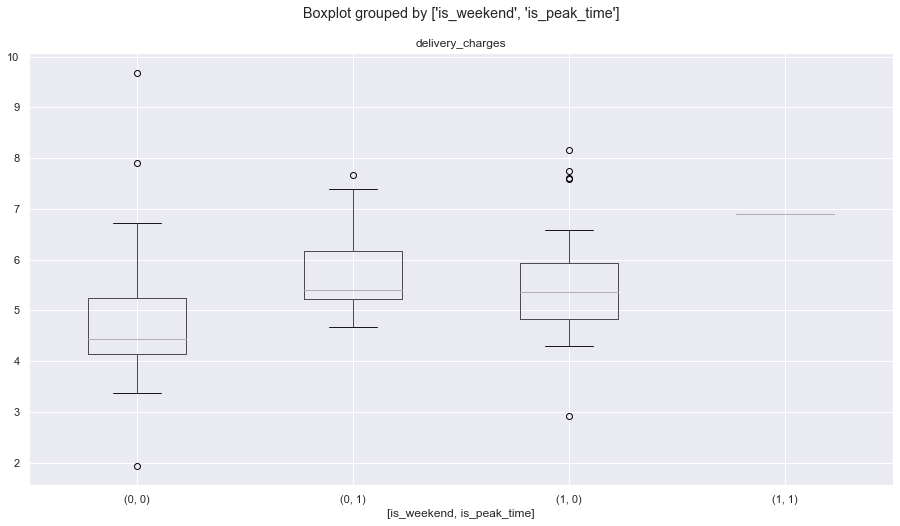

In [162]:
df_0732.boxplot(column = 'delivery_charges', by = ['is_weekend', 'is_peak_time'])

<Axes: xlabel='travel_time_minutes', ylabel='delivery_charges'>

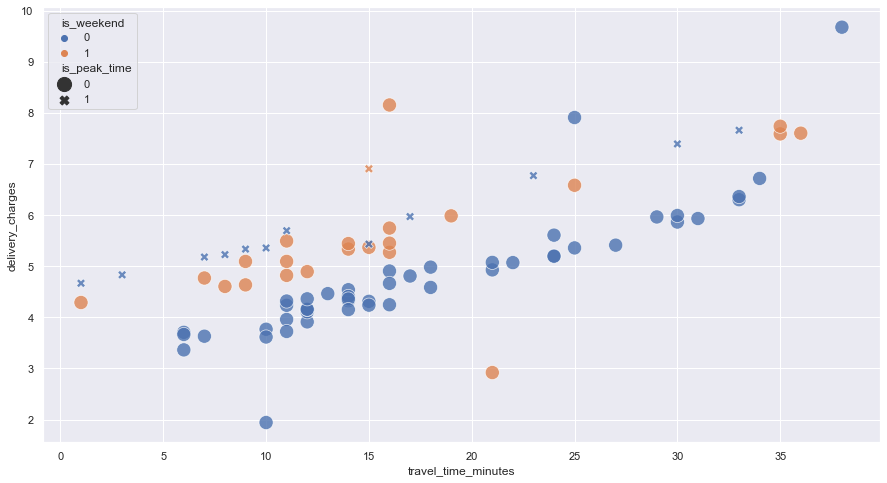

In [163]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = df_0732, x = "travel_time_minutes", y = "delivery_charges", hue = "is_weekend", style = "is_peak_time", size = "is_peak_time", alpha = 0.8, sizes = (80, 200))

Just by looking at the plots, some immediately occur as outliers. Let's confirm:

***weekend: 0, peak time: 0***
        
Some stats:

In [164]:
df_0732[(df_0732.is_weekend == 0) & (df_0732.is_peak_time == 0)]['delivery_charges'].describe()

count    48.000000
mean      4.798058
std       1.244365
min       1.940900
25%       4.141350
50%       4.436650
75%       5.238125
max       9.679050
Name: delivery_charges, dtype: float64

In [165]:
Q1 = df_0732[(df_0732.is_weekend == 0) & (df_0732.is_peak_time == 0)].delivery_charges.describe()['25%']
Q3 = df_0732[(df_0732.is_weekend == 0) & (df_0732.is_peak_time == 0)].delivery_charges.describe()['75%']
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

Q1, Q3, IQR, upper, lower

(4.14135, 5.238125, 1.096775, 6.8832875, 2.4961875)

In [166]:
#returns records that are considered outliers, according to the lower and upper fence values
df = df_0732[((df_0732.is_weekend == 0) & (df_0732.is_peak_time == 0)) & ((df_0732.delivery_charges > upper) | (df_0732.delivery_charges < lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
241,ORD252592,REST0732,CUST09254,COUR1973,-37.809569,144.963802,2020-05-12,05:28:21,0,0,Motorbike,"[('sandwiches', 1), ('coffee', 2)]",0,37.720,5069,10,1.94090,6.97
327,ORD219936,REST0732,CUST06532,COUR0094,-37.824169,144.983700,2020-09-17,05:00:39,0,0,Bike,"[('pasta', 2), ('waffles', 1), ('coffee', 1), ...",10,56.025,4910,25,7.91115,6.97
189,ORD031697,REST0732,CUST13130,COUR3023,-37.815060,144.939276,2020-12-28,09:45:29,0,0,Bike,"[('pasta', 3), ('paneer burger', 1)]",20,21.224,7511,38,9.67905,6.97


In [167]:
#returns records within the upper and lower fence values
df = df_0732[((df_0732.is_weekend == 0) & (df_0732.is_peak_time == 0)) & ((df_0732.delivery_charges <= upper) & (df_0732.delivery_charges >= lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
245,ORD163970,REST0732,CUST11411,COUR0669,-37.803445,144.991412,2020-09-01,02:18:27,0,0,Motorbike,"[('waffles', 2), ('paneer burger', 1)]",40,31.464,3106,6,3.3630,6.97
42,ORD301302,REST0732,CUST11897,COUR3001,-37.818252,145.001559,2020-11-05,16:01:19,0,0,Motorbike,"[('pasta', 2), ('sandwiches', 3), ('coffee', 2)]",0,93.980,3071,6,3.7068,6.97
407,ORD281195,REST0732,CUST10332,COUR4719,-37.820091,145.002424,2020-06-01,02:10:32,0,0,Motorbike,"[('burgers', 3), ('waffles', 1), ('paneer burg...",0,101.670,3142,6,3.6651,6.97
92,ORD002966,REST0732,CUST06422,COUR2001,-37.803611,145.005769,2020-08-17,04:36:55,0,0,Bike,"[('coffee', 1), ('burgers', 2), ('waffles', 3)...",0,173.810,1451,7,3.6306,6.97
455,ORD260453,REST0732,CUST03069,COUR0120,-37.800578,144.971437,2020-02-21,08:50:06,0,0,Car,"[('pasta', 1), ('burgers', 1)]",0,22.880,3980,10,3.6154,6.97
35,ORD042380,REST0732,CUST02581,COUR4174,-37.803123,144.961601,2020-03-16,04:21:05,0,0,Motorbike,"[('waffles', 1), ('pasta', 1)]",0,29.330,5073,10,3.7669,6.97
406,ORD021500,REST0732,CUST06304,COUR3628,-37.806532,144.957110,2020-07-02,07:58:40,0,0,Motorbike,"[('coffee', 1), ('pasta', 1), ('sandwiches', 1)]",0,36.200,5676,11,4.3186,6.97
124,ORD186263,REST0732,CUST08987,COUR1631,-37.812641,144.959718,2020-03-23,11:28:21,0,0,Motorbike,"[('burgers', 2), ('coffee', 3)]",0,56.870,5609,11,3.9585,6.97
109,ORD241495,REST0732,CUST07216,COUR2685,-37.810227,144.970887,2020-01-23,06:39:33,0,0,Car,"[('sandwiches', 1), ('pasta', 3)]",20,32.984,4629,11,4.2355,6.97
454,ORD322977,REST0732,CUST08614,COUR1112,-37.810073,144.976216,2020-10-01,20:58:01,0,0,Car,"[('salads', 2), ('paneer burger', 2), ('waffle...",0,101.830,4399,11,3.7236,6.97


For this combination, the indices specified by the upper and lower fences and the scatter plot suggest the same outliers. However, for now let's just put row index 189 aside and add the others to the outliers list. 

In [168]:
df_0732_outliers.extend([241, 327])
df_0732_outliers

[241, 327]

***weekend: 0, peak time: 1***
        
Basic statistics:

In [169]:
df_0732[(df_0732.is_weekend == 0) & (df_0732.is_peak_time == 1)]['delivery_charges'].describe()

count    12.000000
mean      5.794392
std       0.975822
min       4.667300
25%       5.215975
50%       5.395750
75%       6.172350
max       7.662300
Name: delivery_charges, dtype: float64

In [170]:
Q1 = df_0732[(df_0732.is_weekend == 0) & (df_0732.is_peak_time == 1)].delivery_charges.describe()['25%']
Q3 = df_0732[(df_0732.is_weekend == 0) & (df_0732.is_peak_time == 1)].delivery_charges.describe()['75%']
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

Q1, Q3, IQR, upper, lower

(5.215975, 6.17235, 0.9563749999999995, 7.606912499999999, 3.781412500000001)

In [171]:
#returns records that are considered outliers, according to the lower and upper fence values
df = df_0732[((df_0732.is_weekend == 0) & (df_0732.is_peak_time == 1)) & ((df_0732.delivery_charges > upper) | (df_0732.delivery_charges < lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
143,ORD081732,REST0732,CUST09423,COUR3063,-37.823525,144.956234,2020-04-23,19:54:43,1,0,Bike,"[('sandwiches', 1), ('waffles', 3), ('paneer b...",0,96.8,6564,33,7.6623,6.97


In [172]:
#returns records within the upper and lower fence values
df = df_0732[((df_0732.is_weekend == 0) & (df_0732.is_peak_time == 1)) & ((df_0732.delivery_charges <= upper) & (df_0732.delivery_charges >= lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
162,ORD097069,REST0732,CUST00676,COUR3178,-37.800646,145.005913,2020-03-11,13:23:04,1,0,Car,"[('salads', 3), ('pasta', 1), ('sandwiches', 3...",0,112.500,611,1,4.6673,6.97
205,ORD211193,REST0732,CUST02547,COUR3168,-37.802561,145.001981,2020-11-17,12:03:57,1,0,Motorbike,"[('salads', 3), ('paneer burger', 1), ('coffee...",10,45.423,1474,3,4.8318,6.97
244,ORD317108,REST0732,CUST02955,COUR3334,-37.800345,144.983181,2020-10-06,13:27:01,1,0,Car,"[('pasta', 3), ('sandwiches', 1), ('paneer bur...",45,34.028,2776,7,5.1802,6.97
123,ORD114233,REST0732,CUST02948,COUR1355,-37.800613,144.977373,2020-10-22,13:03:17,1,0,Car,"[('sandwiches', 2), ('waffles', 1), ('pasta', 1)]",40,43.494,3356,8,5.2279,6.97
54,ORD308731,REST0732,CUST03109,COUR1885,-37.814039,144.985699,2020-06-25,18:39:33,1,0,Car,"[('coffee', 3), ('sandwiches', 3)]",0,88.950,3588,9,5.3357,6.97
317,ORD339778,REST0732,CUST00348,COUR0687,-37.818750,144.983448,2020-03-05,12:51:25,1,0,Car,"[('sandwiches', 2), ('waffles', 3), ('coffee',...",40,87.564,4288,10,5.3577,6.97
351,ORD190217,REST0732,CUST00339,COUR1235,-37.821036,144.983106,2020-02-26,19:42:51,1,0,Car,"[('pasta', 2), ('salads', 3), ('paneer burger'...",0,78.520,4508,11,5.6963,6.97
483,ORD172510,REST0732,CUST10881,COUR1472,-37.808417,144.952060,2020-01-10,18:31:38,1,0,Car,"[('coffee', 3), ('sandwiches', 3), ('paneer bu...",45,67.480,6314,15,5.4338,6.97
494,ORD060828,REST0732,CUST04528,COUR3452,-37.815182,144.949336,2020-02-19,19:11:12,1,0,Car,"[('paneer burger', 2), ('pasta', 2), ('waffles...",0,72.420,7266,17,5.9719,6.97
492,ORD162979,REST0732,CUST04963,COUR4093,-37.812174,144.973941,2020-07-29,18:35:36,1,0,Bike,"[('sandwiches', 1), ('pasta', 1), ('burgers', 1)]",0,44.460,4572,23,6.7737,6.97


Since there is only one point as an outlier for this given combination, that does also look fine with respect to the scatter plot, there are no outliers.

***weekend: 1, peak time: 0***

Let's look at the statistics:

In [173]:
df_0732[(df_0732.is_weekend == 1) & (df_0732.is_peak_time == 0)]['delivery_charges'].describe()

count    22.000000
mean      5.586445
std       1.265815
min       2.919000
25%       4.839475
50%       5.353100
75%       5.926225
max       8.156400
Name: delivery_charges, dtype: float64

In [174]:
Q1 = df_0732[(df_0732.is_weekend == 1) & (df_0732.is_peak_time == 0)].delivery_charges.describe()['25%']
Q3 = df_0732[(df_0732.is_weekend == 1) & (df_0732.is_peak_time == 0)].delivery_charges.describe()['75%']
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

Q1, Q3, IQR, upper, lower

(4.839475,
 5.9262250000000005,
 1.0867500000000003,
 7.556350000000001,
 3.2093499999999997)

In [175]:
#returns records that are considered outliers, according to the lower and upper fence values
df = df_0732[((df_0732.is_weekend == 1) & (df_0732.is_peak_time == 0)) & ((df_0732.delivery_charges > upper) | (df_0732.delivery_charges < lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
91,ORD105999,REST0732,CUST07297,COUR0879,-37.819663,144.952026,2020-12-05,02:30:19,0,1,Car,"[('coffee', 2), ('pasta', 1), ('burgers', 3), ...",20,62.848,6712,16,8.1564,6.97
450,ORD220709,REST0732,CUST06735,COUR0393,-37.808135,144.973143,2020-06-21,01:15:09,0,1,Bike,"[('sandwiches', 1), ('burgers', 3)]",0,70.570,4223,21,2.9190,6.97
116,ORD081856,REST0732,CUST09049,COUR0774,-37.811964,144.945641,2020-10-03,11:32:18,0,1,Bike,"[('waffles', 1), ('pasta', 2), ('salads', 2), ...",20,60.608,7013,35,7.5903,6.97
197,ORD063174,REST0732,CUST04520,COUR2107,-37.816804,144.950658,2020-02-02,02:54:03,0,1,Bike,"[('coffee', 1), ('waffles', 1), ('burgers', 1)...",0,53.730,7049,35,7.7403,6.97
462,ORD117921,REST0732,CUST03875,COUR0594,-37.822330,144.946995,2020-10-17,06:07:54,0,1,Bike,"[('pasta', 1), ('burgers', 1), ('coffee', 3)]",0,47.090,7160,36,7.6043,6.97


In [176]:
#returns records within the upper and lower fence values
df = df_0732[((df_0732.is_weekend == 1) & (df_0732.is_peak_time == 0)) & ((df_0732.delivery_charges <= upper) & (df_0732.delivery_charges >= lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
212,ORD330659,REST0732,CUST02354,COUR4908,-37.801146,145.007914,2020-11-29,00:19:46,0,1,Car,"[('paneer burger', 2), ('pasta', 1)]",10,18.279,542,1,4.2902,6.97
416,ORD347028,REST0732,CUST08118,COUR1021,-37.817826,144.992328,2020-05-24,02:06:35,0,1,Motorbike,"[('burgers', 3), ('coffee', 2), ('paneer burge...",0,78.890,3429,7,4.7696,6.97
334,ORD154704,REST0732,CUST13637,COUR3659,-37.804601,144.974586,2020-12-13,04:48:47,0,1,Motorbike,"[('coffee', 1), ('sandwiches', 1), ('salads', 2)]",0,47.950,3945,8,4.6050,6.97
52,ORD045963,REST0732,CUST13538,COUR1235,-37.801377,144.974345,2020-11-01,14:14:30,0,1,Car,"[('pasta', 2), ('paneer burger', 3), ('salads'...",0,69.260,3690,9,4.6350,6.97
155,ORD024111,REST0732,CUST01163,COUR0589,-37.805481,144.971658,2020-05-24,17:48:07,0,1,Motorbike,"[('pasta', 2), ('burgers', 3)]",20,49.672,4270,9,5.0943,6.97
163,ORD004297,REST0732,CUST06799,COUR1975,-37.803825,144.956208,2020-11-14,23:12:31,0,1,Motorbike,"[('pasta', 1), ('paneer burger', 1), ('salads'...",40,13.548,5591,11,5.0947,6.97
10,ORD295186,REST0732,CUST01764,COUR1617,-37.808618,144.970996,2020-01-26,01:23:04,0,1,Car,"[('sandwiches', 1), ('pasta', 2)]",0,34.680,4481,11,5.4949,6.97
79,ORD035929,REST0732,CUST03617,COUR1837,-37.820261,144.969544,2020-02-15,23:40:13,0,1,Motorbike,"[('sandwiches', 2), ('salads', 2), ('waffles',...",0,126.670,5558,11,4.8212,6.97
38,ORD239308,REST0732,CUST05500,COUR2514,-37.815388,144.963293,2020-05-24,22:13:11,0,1,Motorbike,"[('salads', 1), ('coffee', 1), ('pasta', 2)]",45,16.676,5767,12,4.8943,6.97
181,ORD130714,REST0732,CUST07420,COUR1185,-37.820008,144.967006,2020-07-25,15:21:45,0,1,Car,"[('waffles', 2), ('coffee', 2)]",0,61.700,5639,14,5.3362,6.97


Though the travel time in minutes are high, the associated values are extreme and differ for all those in proximity to them, hence rows with indices 91 and 450 are outliers.
The other rows that the upper and lower fences suggest as outliers look okay on the scatter plot.

In [177]:
df_0732_outliers.extend([91, 450])
df_0732_outliers

[241, 327, 91, 450]

***weekend: 1, peak time: 1***
        
What do the stats look like? Let's see:

In [178]:
df_0732[(df_0732.is_weekend == 1) & (df_0732.is_peak_time == 1)]['delivery_charges'].describe()

count    1.0000
mean     6.9075
std         NaN
min      6.9075
25%      6.9075
50%      6.9075
75%      6.9075
max      6.9075
Name: delivery_charges, dtype: float64

In [179]:
Q1 = df_0732[(df_0732.is_weekend == 1) & (df_0732.is_peak_time == 1)].delivery_charges.describe()['25%']
Q3 = df_0732[(df_0732.is_weekend == 1) & (df_0732.is_peak_time == 1)].delivery_charges.describe()['75%']
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

Q1, Q3, IQR, upper, lower

(6.9075, 6.9075, 0.0, 6.9075, 6.9075)

In [180]:
#returns records that are considered outliers, according to the lower and upper fence values
df = df_0732[((df_0732.is_weekend == 1) & (df_0732.is_peak_time == 1)) & ((df_0732.delivery_charges > upper) | (df_0732.delivery_charges < lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating


In [181]:
#returns records within the upper and lower fence values
df = df_0732[((df_0732.is_weekend == 1) & (df_0732.is_peak_time == 1)) & ((df_0732.delivery_charges <= upper) & (df_0732.delivery_charges >= lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
394,ORD278608,REST0732,CUST08511,COUR3310,-37.816581,144.937447,2020-07-05,13:58:40,1,1,Motorbike,"[('salads', 2), ('paneer burger', 1), ('burger...",0,41.51,7730,15,6.9075,6.97


No outliers! This one point looks okay on the scatter plot as well.

In [182]:
df_0732_outliers

[241, 327, 91, 450]

**REST1634**

Any outliers in this final subset? Let's detect below:

In [183]:
#extracting the subset based on the rating
print(outliers[outliers.restaurant_rating == 6.64]['restaurant_id'][1])
df_1634 = outliers[outliers.restaurant_rating == 6.64]
#df_1634
df_1634_outliers = list()

REST1634


<Axes: title={'center': 'delivery_charges'}, xlabel='[is_weekend, is_peak_time]'>

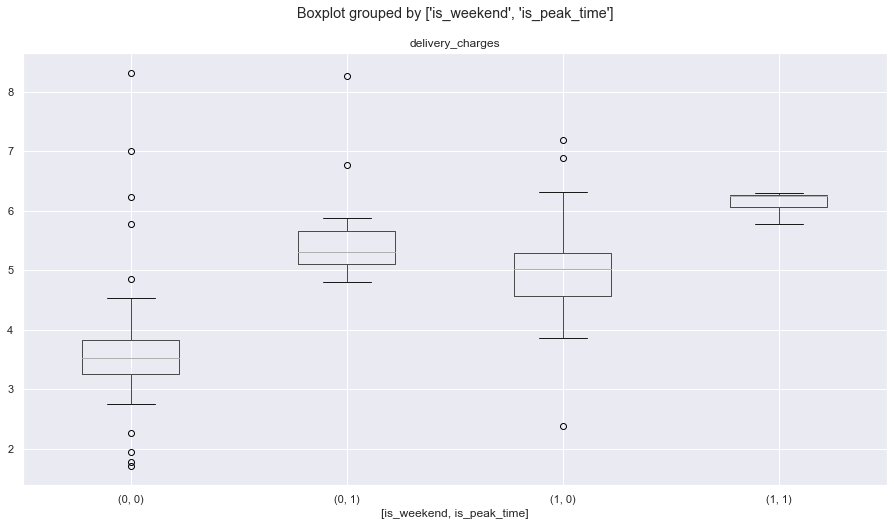

In [184]:
df_1634.boxplot(column = 'delivery_charges', by = ['is_weekend', 'is_peak_time'])

<Axes: xlabel='travel_time_minutes', ylabel='delivery_charges'>

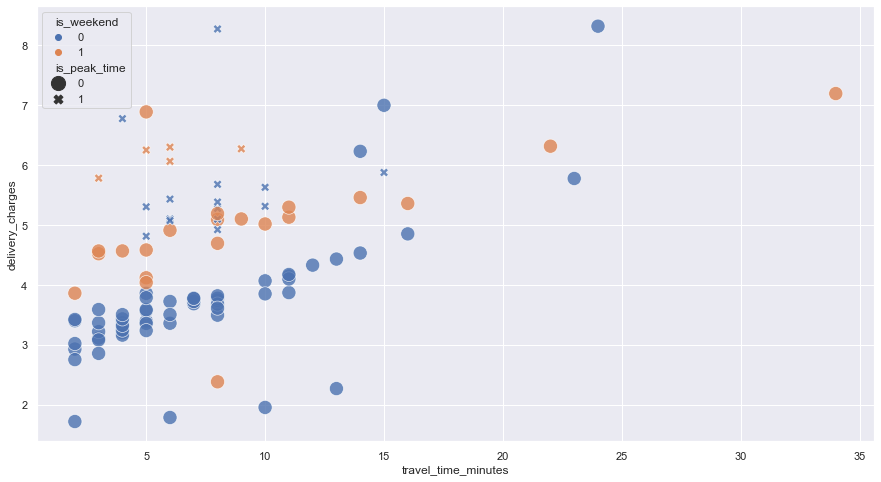

In [185]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = df_1634, x = "travel_time_minutes", y = "delivery_charges", hue = "is_weekend", style = "is_peak_time", size = "is_peak_time", alpha = 0.8, sizes = (80, 200))

Seem to be quite a few outliers present here.

***weekend: 0, peak time: 0***
        
Some statistics include:

In [186]:
df_1634[(df_1634.is_weekend == 0) & (df_1634.is_peak_time == 0)]['delivery_charges'].describe()

count    60.000000
mean      3.688646
std       1.054697
min       1.716100
25%       3.254125
50%       3.532900
75%       3.823750
max       8.318250
Name: delivery_charges, dtype: float64

In [187]:
Q1 = df_1634[(df_1634.is_weekend == 0) & (df_1634.is_peak_time == 0)].delivery_charges.describe()['25%']
Q3 = df_1634[(df_1634.is_weekend == 0) & (df_1634.is_peak_time == 0)].delivery_charges.describe()['75%']
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

Q1, Q3, IQR, upper, lower

(3.254125, 3.82375, 0.5696249999999998, 4.6781875, 2.3996875000000006)

In [188]:
#returns records that are considered outliers, according to the lower and upper fence values
df = df_1634[((df_1634.is_weekend == 0) & (df_1634.is_peak_time == 0)) & ((df_1634.delivery_charges > upper) | (df_1634.delivery_charges < lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
127,ORD257586,REST1634,CUST00401,COUR2719,-37.821458,144.983876,2020-12-11,22:36:55,0,0,Car,"[('thin crust pizza', 3), ('farm pizza', 2), (...",0,88.460,714,2,1.71610,6.64
262,ORD106503,REST1634,CUST11765,COUR4702,-37.827312,145.013004,2020-04-21,10:01:19,0,0,Motorbike,"[('ice tea', 2), ('supreme pizza', 1), ('pasta...",20,56.448,3190,6,1.78360,6.64
362,ORD335770,REST1634,CUST02971,COUR1042,-37.799843,144.947011,2020-06-23,23:56:02,0,0,Car,"[('farm pizza', 3), ('supreme pizza', 2), ('pa...",45,38.561,4313,10,1.95170,6.64
384,ORD022910,REST1634,CUST10578,COUR4098,-37.806268,144.932653,2020-02-27,07:38:54,0,0,Car,"[('thin crust pizza', 2), ('farm pizza', 1), (...",0,92.860,5443,13,2.26625,6.64
344,ORD345664,REST1634,CUST09153,COUR4529,-37.816309,144.955755,2020-08-18,04:25:03,0,0,Bike,"[('pasta', 3), ('supreme pizza', 1), ('thin cr...",0,104.970,2872,14,6.22890,6.64
355,ORD262074,REST1634,CUST00809,COUR2712,-37.817714,144.954927,2020-11-20,02:10:32,0,0,Bike,"[('supreme pizza', 1), ('thin crust pizza', 2)...",45,65.615,2912,15,6.99735,6.64
207,ORD203555,REST1634,CUST10507,COUR4345,-37.799932,145.002521,2020-02-27,08:42:11,0,0,Bike,"[('thin crust pizza', 2), ('ice tea', 3)]",20,84.856,3186,16,4.85000,6.64
226,ORD017000,REST1634,CUST04611,COUR0859,-37.807924,144.942819,2020-10-13,21:01:58,0,0,Bike,"[('potato wedges', 1), ('farm pizza', 2), ('ic...",0,101.650,4520,23,5.77490,6.64
375,ORD338787,REST1634,CUST05863,COUR2076,-37.806587,144.941482,2020-08-18,08:22:25,0,0,Bike,"[('farm pizza', 3), ('supreme pizza', 2), ('po...",0,64.640,4703,24,8.31825,6.64


In [189]:
#returns records within the upper and lower fence values
df = df_1634[((df_1634.is_weekend == 0) & (df_1634.is_peak_time == 0)) & ((df_1634.delivery_charges <= upper) & (df_1634.delivery_charges >= lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
154,ORD305169,REST1634,CUST06452,COUR4491,-37.815596,144.974068,2020-03-27,17:48:07,0,0,Car,"[('pasta', 3), ('supreme pizza', 3), ('ice tea...",40,73.782,938,2,2.7501,6.64
114,ORD003938,REST1634,CUST06472,COUR4130,-37.814954,144.991773,2020-12-18,07:34:56,0,0,Motorbike,"[('pasta', 3), ('thin crust pizza', 2), ('supr...",0,119.560,832,2,3.4205,6.64
40,ORD261505,REST1634,CUST03168,COUR2696,-37.807057,144.985559,2020-02-21,14:34:17,0,0,Motorbike,"[('potato wedges', 3), ('pasta', 3)]",45,39.088,1220,2,2.9261,6.64
367,ORD252582,REST1634,CUST07932,COUR3976,-37.813662,144.974255,2020-05-14,04:32:58,0,0,Car,"[('ice tea', 3), ('supreme pizza', 1), ('potat...",0,117.190,1023,2,3.0187,6.64
53,ORD105277,REST1634,CUST04924,COUR2844,-37.815183,144.971380,2020-10-01,23:20:26,0,0,Motorbike,"[('ice tea', 3), ('supreme pizza', 3), ('farm ...",40,60.618,1241,2,3.3989,6.64
193,ORD347087,REST1634,CUST11717,COUR3565,-37.810080,144.996038,2020-08-26,14:02:38,0,0,Motorbike,"[('farm pizza', 2), ('thin crust pizza', 1)]",20,29.616,1629,3,3.0797,6.64
258,ORD267111,REST1634,CUST02475,COUR0055,-37.822620,144.992276,2020-10-15,11:08:34,0,0,Car,"[('supreme pizza', 2), ('farm pizza', 3), ('po...",0,106.260,1150,3,2.8539,6.64
283,ORD050391,REST1634,CUST05884,COUR3891,-37.811666,144.990203,2020-11-24,20:46:09,0,0,Car,"[('potato wedges', 3), ('thin crust pizza', 2)]",10,74.700,1066,3,3.5864,6.64
221,ORD288373,REST1634,CUST04120,COUR1603,-37.820554,144.984997,2020-10-13,16:13:11,0,0,Bike,"[('supreme pizza', 3), ('potato wedges', 3), (...",10,85.635,563,3,3.3655,6.64
37,ORD258450,REST1634,CUST00334,COUR4705,-37.819384,144.989478,2020-05-05,21:53:24,0,0,Bike,"[('ice tea', 1), ('pasta', 1)]",0,31.380,678,3,3.1096,6.64


Except for rows with indices 207, 226 the others are outliers. The scatterplot suggests these (207 and 226 row indices) look fine and similar to those around them as well. 

In [190]:
df_1634_outliers.extend([127, 262, 362, 384, 344, 355, 375])
df_1634_outliers

[127, 262, 362, 384, 344, 355, 375]

***weekend: 0, peak time: 1***
        
Statistics:

In [191]:
df_1634[(df_1634.is_weekend == 0) & (df_1634.is_peak_time == 1)]['delivery_charges'].describe()

count    15.000000
mean      5.594967
std       0.879245
min       4.811100
25%       5.097100
50%       5.311000
75%       5.652200
max       8.271750
Name: delivery_charges, dtype: float64

In [192]:
Q1 = df_1634[(df_1634.is_weekend == 0) & (df_1634.is_peak_time == 1)].delivery_charges.describe()['25%']
Q3 = df_1634[(df_1634.is_weekend == 0) & (df_1634.is_peak_time == 1)].delivery_charges.describe()['75%']
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

Q1, Q3, IQR, upper, lower

(5.097099999999999,
 5.652200000000001,
 0.5551000000000013,
 6.4848500000000024,
 4.264449999999997)

In [193]:
#returns records that are considered outliers, according to the lower and upper fence values
df = df_1634[((df_1634.is_weekend == 0) & (df_1634.is_peak_time == 1)) & ((df_1634.delivery_charges > upper) | (df_1634.delivery_charges < lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
306,ORD224697,REST1634,CUST11877,COUR2803,-37.810995,145.000582,2020-10-02,18:43:30,1,0,Motorbike,"[('ice tea', 2), ('farm pizza', 1)]",0,49.220,1985,4,6.77445,6.64
299,ORD212022,REST1634,CUST08760,COUR3348,-37.812740,145.013045,2020-09-23,12:27:41,1,0,Car,"[('ice tea', 1), ('supreme pizza', 1)]",20,22.888,3150,8,8.27175,6.64


In [194]:
#returns records within the upper and lower fence values
df = df_1634[((df_1634.is_weekend == 0) & (df_1634.is_peak_time == 1)) & ((df_1634.delivery_charges <= upper) & (df_1634.delivery_charges >= lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
398,ORD068602,REST1634,CUST08606,COUR4135,-37.828362,144.987136,2020-01-01,12:07:54,1,0,Car,"[('farm pizza', 1), ('potato wedges', 1)]",20,16.576,2102,5,5.3020,6.64
468,ORD009843,REST1634,CUST09288,COUR3160,-37.818303,144.960713,2020-08-27,19:38:54,1,0,Motorbike,"[('pasta', 2), ('farm pizza', 2), ('thin crust...",10,52.344,2268,5,4.8111,6.64
151,ORD033702,REST1634,CUST06875,COUR1934,-37.806669,144.962491,2020-07-13,13:03:17,1,0,Car,"[('thin crust pizza', 1), ('pasta', 2)]",0,42.960,2547,6,5.0985,6.64
329,ORD191527,REST1634,CUST08701,COUR2501,-37.823133,144.951741,2020-10-08,18:23:44,1,0,Motorbike,"[('pasta', 3), ('potato wedges', 3)]",0,71.070,3172,6,5.4308,6.64
473,ORD223224,REST1634,CUST06539,COUR4160,-37.824203,144.984151,2020-08-21,19:27:01,1,0,Bike,"[('farm pizza', 1), ('ice tea', 3), ('potato w...",20,95.968,1204,6,5.0710,6.64
12,ORD027142,REST1634,CUST12702,COUR2371,-37.803524,144.949886,2020-12-28,19:50:46,1,0,Motorbike,"[('supreme pizza', 3), ('ice tea', 3), ('farm ...",45,71.374,3881,8,5.2762,6.64
81,ORD125939,REST1634,CUST12598,COUR2781,-37.803496,144.949734,2020-01-08,19:19:07,1,0,Motorbike,"[('supreme pizza', 1), ('thin crust pizza', 3)]",0,73.260,3880,8,5.6770,6.64
137,ORD177042,REST1634,CUST10068,COUR3946,-37.824966,144.976192,2020-08-13,19:38:54,1,0,Bike,"[('farm pizza', 3), ('pasta', 1)]",0,33.370,1578,8,5.3822,6.64
219,ORD150202,REST1634,CUST00455,COUR1912,-37.812786,144.943269,2020-11-02,18:07:54,1,0,Motorbike,"[('thin crust pizza', 2), ('farm pizza', 3), (...",10,78.525,4238,8,4.9202,6.64
319,ORD177053,REST1634,CUST12214,COUR1520,-37.824331,144.952469,2020-05-27,19:07:15,1,0,Car,"[('pasta', 3), ('thin crust pizza', 1), ('ice ...",0,142.200,3239,8,5.0957,6.64


These (row indices 306, 299) have values that differ when compared to those with same and close travel time values. They are outliers.

In [195]:
df_1634_outliers.extend([306, 299])
df_1634_outliers

[127, 262, 362, 384, 344, 355, 375, 306, 299]

***weekend: 1, peak time: 0***

Some basic stats include:

In [196]:
df_1634[(df_1634.is_weekend == 1) & (df_1634.is_peak_time == 0)]['delivery_charges'].describe()

count    21.000000
mean      4.964233
std       1.032781
min       2.379600
25%       4.564000
50%       5.015000
75%       5.295700
max       7.193500
Name: delivery_charges, dtype: float64

In [197]:
Q1 = df_1634[(df_1634.is_weekend == 1) & (df_1634.is_peak_time == 0)].delivery_charges.describe()['25%']
Q3 = df_1634[(df_1634.is_weekend == 1) & (df_1634.is_peak_time == 0)].delivery_charges.describe()['75%']
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

Q1, Q3, IQR, upper, lower

(4.564, 5.2957, 0.7317, 6.39325, 3.46645)

In [198]:
#returns records that are considered outliers, according to the lower and upper fence values
df = df_1634[((df_1634.is_weekend == 1) & (df_1634.is_peak_time == 0)) & ((df_1634.delivery_charges > upper) | (df_1634.delivery_charges < lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
463,ORD308226,REST1634,CUST01379,COUR3478,-37.812346,144.965788,2020-10-10,01:19:07,0,1,Car,"[('pasta', 1), ('farm pizza', 2), ('ice tea', ...",40,56.178,2017,5,6.8871,6.64
359,ORD285863,REST1634,CUST02745,COUR0627,-37.808394,144.948696,2020-10-31,02:38:14,0,1,Motorbike,"[('farm pizza', 2), ('potato wedges', 1)]",0,28.320,3955,8,2.3796,6.64
320,ORD131597,REST1634,CUST01014,COUR1012,-37.801346,144.917442,2020-09-13,11:36:15,0,1,Bike,"[('thin crust pizza', 3), ('supreme pizza', 2)...",0,88.660,6749,34,7.1935,6.64


In [199]:
#returns records within the upper and lower fence values
df = df_1634[((df_1634.is_weekend == 1) & (df_1634.is_peak_time == 0)) & ((df_1634.delivery_charges <= upper) & (df_1634.delivery_charges >= lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
346,ORD234266,REST1634,CUST03475,COUR2062,-37.814586,144.993444,2020-06-06,10:01:19,0,1,Motorbike,"[('supreme pizza', 3), ('pasta', 1)]",0,33.970,1016,2,3.8593,6.64
89,ORD288471,REST1634,CUST08475,COUR1195,-37.824757,144.989452,2020-10-10,16:09:13,0,1,Car,"[('thin crust pizza', 3), ('pasta', 2)]",0,86.600,1195,3,4.5179,6.64
210,ORD059879,REST1634,CUST09780,COUR4214,-37.814365,144.988299,2020-10-11,01:58:40,0,1,Bike,"[('potato wedges', 3), ('supreme pizza', 1), (...",0,83.170,551,3,4.5640,6.64
25,ORD226269,REST1634,CUST05269,COUR2347,-37.817737,144.966926,2020-10-18,03:17:48,0,1,Car,"[('potato wedges', 2), ('thin crust pizza', 3)...",40,79.992,1626,4,4.5650,6.64
76,ORD248127,REST1634,CUST01277,COUR3471,-37.804215,144.974839,2020-01-26,15:05:56,0,1,Car,"[('ice tea', 1), ('supreme pizza', 3)]",0,44.210,1998,5,4.1168,6.64
78,ORD245484,REST1634,CUST05241,COUR1235,-37.819224,144.961130,2020-12-19,01:27:01,0,1,Car,"[('pasta', 2), ('supreme pizza', 1)]",20,23.152,2167,5,4.5811,6.64
296,ORD219509,REST1634,CUST00908,COUR0291,-37.825666,144.980089,2020-12-19,22:36:55,0,1,Car,"[('pasta', 1), ('supreme pizza', 2)]",0,26.170,2185,5,4.0366,6.64
4,ORD258494,REST1634,CUST06902,COUR1449,-37.804178,144.958503,2020-04-18,00:39:33,0,1,Motorbike,"[('thin crust pizza', 2), ('ice tea', 2), ('po...",0,111.500,3061,6,4.9101,6.64
106,ORD222091,REST1634,CUST12654,COUR1910,-37.803534,144.949988,2020-09-20,20:14:30,0,1,Motorbike,"[('pasta', 2), ('supreme pizza', 2), ('farm pi...",0,93.560,3891,8,5.0903,6.64
383,ORD059473,REST1634,CUST10088,COUR4741,-37.807410,145.010535,2020-06-28,23:08:34,0,1,Car,"[('ice tea', 2), ('farm pizza', 2), ('thin cru...",45,57.684,3274,8,5.1888,6.64


Rows (indices 463, 359) have extreme values. But the row with index 320 is the only point whose travel time is after 25 minutes. Being the only point in that region and most of them being concentrated within the 15 minutes range, maybe this was considered an outlier.
This point, however, looks fine on the scatterplot.

In [200]:
df_1634_outliers.extend([463, 359])
df_1634_outliers

[127, 262, 362, 384, 344, 355, 375, 306, 299, 463, 359]

***weekend: 1, peak time: 1***
        
Calculating some basic statistical values:

In [201]:
df_1634[(df_1634.is_weekend == 1) & (df_1634.is_peak_time == 1)]['delivery_charges'].describe()

count    5.000000
mean     6.131820
std      0.217484
min      5.780200
25%      6.061300
50%      6.249600
75%      6.269900
max      6.298100
Name: delivery_charges, dtype: float64

In [202]:
Q1 = df_1634[(df_1634.is_weekend == 1) & (df_1634.is_peak_time == 1)].delivery_charges.describe()['25%']
Q3 = df_1634[(df_1634.is_weekend == 1) & (df_1634.is_peak_time == 1)].delivery_charges.describe()['75%']
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

Q1, Q3, IQR, upper, lower

(6.0613, 6.2699, 0.20859999999999967, 6.582799999999999, 5.7484)

In [203]:
#returns records that are considered outliers, according to the lower and upper fence values
df = df_1634[((df_1634.is_weekend == 1) & (df_1634.is_peak_time == 1)) & ((df_1634.delivery_charges > upper) | (df_1634.delivery_charges < lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating


In [204]:
#returns records within the upper and lower fence values
df = df_1634[((df_1634.is_weekend == 1) & (df_1634.is_peak_time == 1)) & ((df_1634.delivery_charges <= upper) & (df_1634.delivery_charges >= lower))]
df.sort_values('travel_time_minutes')

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
50,ORD147048,REST1634,CUST11898,COUR0027,-37.818221,145.001444,2020-03-22,12:03:57,1,1,Motorbike,"[('pasta', 3), ('potato wedges', 3), ('supreme...",0,128.29,1593,3,5.7802,6.64
16,ORD281485,REST1634,CUST00861,COUR4257,-37.819445,144.971727,2020-10-24,13:46:48,1,1,Car,"[('potato wedges', 3), ('farm pizza', 3), ('th...",0,83.98,1930,5,6.2496,6.64
231,ORD102788,REST1634,CUST13093,COUR1097,-37.823263,144.983024,2020-03-22,19:42:51,1,1,Bike,"[('ice tea', 2), ('pasta', 2), ('supreme pizza...",0,70.56,1297,6,6.0613,6.64
487,ORD189517,REST1634,CUST12319,COUR1624,-37.815698,144.958266,2020-04-26,18:31:38,1,1,Car,"[('pasta', 1), ('ice tea', 3), ('supreme pizza...",0,88.60,2630,6,6.2981,6.64
374,ORD262676,REST1634,CUST11080,COUR3069,-37.807040,144.949851,2020-10-11,18:47:28,1,1,Car,"[('supreme pizza', 1), ('potato wedges', 3)]",0,47.16,3836,9,6.2699,6.64


There are no outliers. Everything looks fine.

In [205]:
df_1634_outliers

[127, 262, 362, 384, 344, 355, 375, 306, 299, 463, 359]

Combining all the lists from above to obtain the final list of rows with outliers:

In [206]:
outlier_rows = list()
outlier_idx = [df_1136_outliers, df_0337_outliers, df_0057_outliers, df_0732_outliers, df_1634_outliers]

In [207]:
for idx in range(len(outlier_idx)):
    for i in range(len(outlier_idx[idx])):
        outlier_rows.append(outlier_idx[idx][i])

In [208]:
#outlier_rows
len(outlier_rows)

36

Dropping these rows (using the index):

In [209]:
for idx in outlier_rows:
    outliers = outliers.drop(idx)

<Axes: xlabel='travel_time_minutes', ylabel='delivery_charges'>

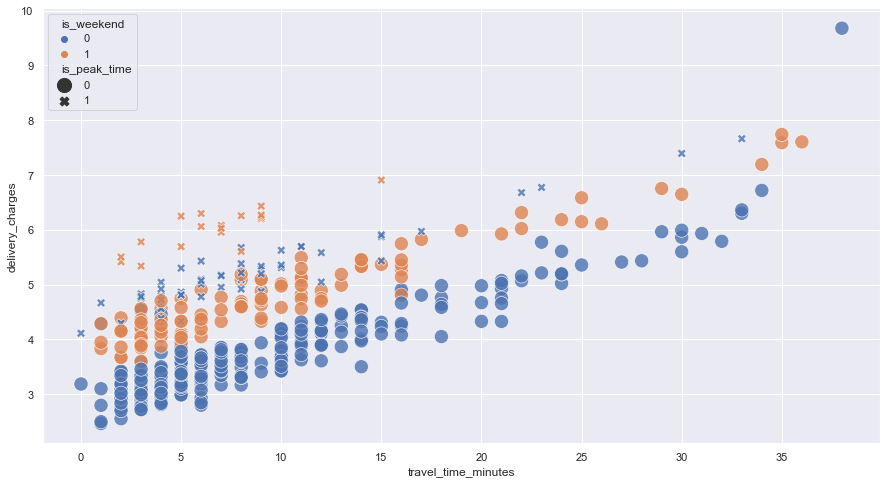

In [210]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = outliers, x = "travel_time_minutes", y = "delivery_charges", hue = "is_weekend", style = "is_peak_time", size = "is_peak_time", alpha = 0.8, sizes = (80, 200))

The scatter plot looks better now (after removal of outliers, of course). However, there is no one point whose value is extreme, let's look at that:

In [211]:
outliers[outliers.travel_time_minutes > 35]

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
189,ORD031697,REST0732,CUST13130,COUR3023,-37.81506,144.939276,2020-12-28,09:45:29,0,0,Bike,"[('pasta', 3), ('paneer burger', 1)]",20,21.224,7511,38,9.67905,6.97
462,ORD117921,REST0732,CUST03875,COUR0594,-37.82233,144.946995,2020-10-17,06:07:54,0,1,Bike,"[('pasta', 1), ('burgers', 1), ('coffee', 3)]",0,47.090,7160,36,7.60430,6.97


The row, whose index is 189, which was put aside earlier is an outlier too. Though the associated travel time is highest for this given dataframe, the delivery charge value is way too large, considering the fact that its value for the columns '`is_weekend`' and '`is_peak_time`' are also 0. Hence, we will drop this too.

In [212]:
outliers = outliers.drop(189)

The number of rows now left will be detected using '`shape`'. Also, this dataframe is written to a '`csv`' file.

In [213]:
outliers.shape

(463, 18)

In [214]:
#outliers.to_csv("outlier_solution.csv", index = False)

## 6. Dealing with the 'missing' dataframe:

###### 6.1 Basic Checking of Dataframe:
First, let's look at certain things related to the dataframe: The first few rows, the dimensions, the datatype of each column followed by the number of missing values in each column and so on.

In [215]:
missing.head()

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
0,ORD319817,REST1136,CUST10155,COUR4336,-37.817637,144.995569,2020-01-14,18:51:25,1,0,Motorbike,"[('thandai', 1), ('salads', 2), ('matka kulfi'...",0,81.90,4780.0,10,NaN,5.5326
1,ORD296120,REST0337,CUST10814,COUR1918,-37.808465,144.955813,2020-02-21,12:35:36,1,0,Motorbike,"[('alur dom', 3), ('bengali pulao', 2)]",0,40.62,1326.0,3,NaN,4.5012
2,ORD241646,REST0057,CUST11372,COUR1536,-37.814573,144.954791,2020-06-05,23:52:05,0,0,Motorbike,"[('chaat', 3), ('chocolate sandwich', 1), ('pa...",0,92.78,NaN,2,NaN,NaN
3,ORD330788,REST0057,CUST12831,COUR2421,-37.800259,144.935419,2020-10-07,00:39:33,0,0,Motorbike,"[('chaat', 3), ('lassi', 1)]",0,53.48,6125.0,12,NaN,4.0000
4,ORD104170,REST0732,CUST01115,COUR1257,-37.806441,144.999719,2020-07-19,16:52:44,0,1,Bike,"[('burgers', 3), ('paneer burger', 1)]",0,55.87,2071.0,10,NaN,5.1189


In [216]:
missing.shape

(500, 18)

In [217]:
missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   restaurant_id                  500 non-null    object 
 2   customer_id                    500 non-null    object 
 3   carrier_id                     500 non-null    object 
 4   customer_lat                   500 non-null    float64
 5   customer_lon                   500 non-null    float64
 6   date                           500 non-null    object 
 7   time                           500 non-null    object 
 8   is_peak_time                   500 non-null    int64  
 9   is_weekend                     500 non-null    int64  
 10  carrier_vehicle                500 non-null    object 
 11  shopping_cart                  500 non-null    object 
 12  coupon_discount                500 non-null    int

###### 6.2 Restaurant Rating:

Since the column '`restaurant_rating`' is empty, we'll fill it based on the id of the restaurant for a given row. 

Let's first have a look at the ids of the restaurants present in the dataframe and whether they are the same as the ones present in the '`dirty`' dataframe or not. If they match, each row is updated with the rating based on the id.

In [218]:
missing.restaurant_rating.isnull().sum()  #counting the number of missing values in the restaurant_rating column

500

In [219]:
missing.restaurant_id.unique()

array(['REST1136', 'REST0337', 'REST0057', 'REST0732', 'REST1634'],
      dtype=object)

In [220]:
list(missing.restaurant_id.unique()).sort() == list(dirty.restaurant_id.unique()).sort()

True

In [221]:
#updating the restaurant rating based on the restaurant id
for rid in rest_ids:
    missing.loc[missing.restaurant_id == rid, 'restaurant_rating'] = ratings[rid]

In [222]:
missing.restaurant_rating.unique()

array([9.39, 7.88, 7.82, 6.97, 6.64])

###### 6.3 Shortest Distance Imputation:

The basic checking suggested that there are some missing values in the '`shortest_distance_to_customer`' column, we'll first confirm the same.

If the above is true, the values will be imputed by calculating the shortest distance from the restaurant to the customer's location for a given row using the complex network that was created above.
We'll add a new column ('`target_nodes`') to hold the associated node value for the given location of customer. The distance between the restaurant and customer's location is calculated, based on Dijkstra's Algorithm, using the '`nx.algorithms.shortest_paths.weighted.dijkstra_path_length()`' function. After the values have been imputed, we'll drop the '`target_nodes`' column from the dataframe.

In [223]:
missing['shortest_distance_to_customer'].isnull().sum() #counting the number of missing values in the distance column

150

In [224]:
missing['target_nodes'] = 0
missing['customer_lat'] = missing['customer_lat'].round(7)
missing['customer_lon'] = missing['customer_lon'].round(7)

#finding the node (from nodes dataframe) of the customer location for those rows with missing distance
for idx in list(missing.index):
    if missing['shortest_distance_to_customer'].isnull()[idx]:
        lat = missing['customer_lat'][idx]
        lon = missing['customer_lon'][idx]
        missing.at[idx, 'target_nodes'] = nodes[(nodes['lat'] == lat) & (nodes['lon'] == lon)]['node']

In [225]:
#May take a while to run
#calculating the distance from the restaurant and customer location for rows with missing distance
for rid in rest_ids:
    i = int(rid[-4:])
    source_n = restaurants[restaurants.restaurant_id == rid]['rest_nodes'][i]
        
    for idx in list(missing[missing.restaurant_id == rid].index):
        if missing['target_nodes'][idx] != 0: 
            target_n = missing['target_nodes'][idx]
            distance = nx.algorithms.shortest_paths.weighted.dijkstra_path_length(G, source = source_n, target = target_n)
            missing.at[idx, 'shortest_distance_to_customer'] = distance  #updating the distance value

In [226]:
missing['shortest_distance_to_customer'].isnull().sum()  #checking for count of nulls in the distance column

0

In [227]:
missing.drop(['target_nodes'], axis = 1, inplace = True)

###### 6.3 Construction of a Linear Model for imputing values in the 'delivery_charges' column:

- Since the '`delivery_charges`' column is depends upon the four other columns ('`is_weekend`', '`is_peak_time`', '`travel_time_minutes`' and '`restaurant_rating`'), we'll build a linear model in the following steps to predict the missing values in the '`delivery_charges`' column.

- The linear model will be trained using a combined dataframe ('`dirty`' and the dataframe with non-null values in the '`delivery_charges`' column) stored in '`new_df`'.

- Another linear model will also be built using the '`dirty`' dataframe only. We'll split this one into training and tests sets for training and testing the performance of the model.

- To choose the best model, we'll also try to check how the models perform on the '`outliers`' dataframe.

The model is chosen based on the R^2 metric. Higher the value, the more the variability in the '`delivery_charges`' is explained by the model.

In [228]:
non_missing = missing[missing.delivery_charges.isnull() == False]  #extraction of rows with a value in the delivery_charges column

In [229]:
non_missing.shape

(350, 18)

In [230]:
new_df = non_missing.append(dirty)  #creation of a dataframe (dirty + non-missing rows (in terms of delivery_charges) of missing dataframe)

<ipython-input-230-828132218290>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = non_missing.append(dirty)  #creation of a dataframe (dirty + non-missing rows (in terms of delivery_charges) of missing dataframe)


In [231]:
new_df.shape  #dimensions

(850, 18)

In [232]:
new_df.head(3)  #first 3 rows

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
0,ORD319817,REST1136,CUST10155,COUR4336,-37.817637,144.995569,2020-01-14,18:51:25,1,0,Motorbike,"[('thandai', 1), ('salads', 2), ('matka kulfi'...",0,81.90,4780.0,10,9.39,5.5326
1,ORD296120,REST0337,CUST10814,COUR1918,-37.808465,144.955813,2020-02-21,12:35:36,1,0,Motorbike,"[('alur dom', 3), ('bengali pulao', 2)]",0,40.62,1326.0,3,7.88,4.5012
3,ORD330788,REST0057,CUST12831,COUR2421,-37.800259,144.935419,2020-10-07,00:39:33,0,0,Motorbike,"[('chaat', 3), ('lassi', 1)]",0,53.48,6125.0,12,7.82,4.0000


In [233]:
new_df.tail(3)  #last three rows

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
497,ORD333517,REST1136,CUST04577,COUR1662,-37.813539,144.948164,2020-05-23,21:45:29,0,1,Bike,"[('beer', 1), ('salads', 1), ('mango lassi', 3...",20,70.47,2038.0,10,9.39,4.4201
498,ORD175249,REST0732,CUST01278,COUR3015,-37.803236,144.975000,2020-12-29,08:10:32,0,0,Motorbike,"[('sandwiches', 1), ('coffee', 2), ('pasta', 3)]",0,57.37,3786.0,8,6.97,3.5962
499,ORD156571,REST0057,CUST13199,COUR1939,-37.820056,144.976839,2020-07-27,04:09:13,0,0,Motorbike,"[('cheese sandwiches', 2), ('cheese sandwich',...",20,61.97,1801.0,4,7.82,2.8128


In [234]:
new_df['order_id'].describe()  #to check if there are any duplicate order ids as a result of combining the dataframes

count           850
unique          850
top       ORD319817
freq              1
Name: order_id, dtype: object

In [235]:
X = new_df.loc[:, ['is_peak_time', 'is_weekend', 'travel_time_minutes', 'restaurant_rating']]  #extraction of independent features
y = new_df.loc[:, ['delivery_charges']]  #extraction of dependent variable

In [236]:
lm_1 = LinearRegression()  #creation of a linear regression model

In [237]:
lm_1.fit(X, y)  #fitting the data to train the model

LinearRegression()

In [238]:
lm_1.score(X, y)  #evaluating performance of the model for the given dataframe (which is the same dataframe)

0.9695804380274033

In [239]:
X = dirty.loc[:, ['is_peak_time', 'is_weekend', 'travel_time_minutes', 'restaurant_rating']]  #independent variables to train
y = dirty.loc[:, ['delivery_charges']]  #dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)  #splitting up of the dataframe into train and test sets

In [240]:
lm_2 = LinearRegression()  #linear regression model creation

In [241]:
lm_2.fit(X_train, y_train)  #training the model

LinearRegression()

In [242]:
lm_2.score(X_test, y_test)  #evaluation of model on the test sets

0.9800722076069166

In [243]:
X_new = outliers.loc[:, ['is_peak_time', 'is_weekend', 'travel_time_minutes', 'restaurant_rating']]  #independent variables
y_new = outliers.loc[:, ['delivery_charges']]  #dependent variables

In [244]:
lm_1.score(X_new, y_new)  #evaluating the first model performance on a new dataset

0.9521837225028016

In [245]:
lm_2.score(X_new, y_new) #evaluating the second model performance on a new dataset

0.952107019769576

Though both the models are performing well, we'll go for the first linear model ('`lm_1`') as it is slightly better in terms of performance than the second model ('`lm_2`') on a new dataframe.

Therefore, our chosen model explains about 96.9% or 97% variability in the '`delivery_charges`' column.

Next, we'll create a dataframe that includes all those rows with a missing value for the delivery charges attribute (stored in '`df_impute`'). We will try to predict these values using our first linear model ('`lm_1`').

Once the values have been predicted, we'll update the '`missing`' dataframe with these.

In [246]:
df_impute = missing[missing.delivery_charges.isnull() == True]  #extraction of rows with the missing delivery charges

In [247]:
df_impute.shape  #dimensions

(150, 18)

In [248]:
df_impute.head(3)  #first three rows

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
2,ORD241646,REST0057,CUST11372,COUR1536,-37.814573,144.954791,2020-06-05,23:52:05,0,0,Motorbike,"[('chaat', 3), ('chocolate sandwich', 1), ('pa...",0,92.78,1130.0,2,7.82,NaN
7,ORD279774,REST1136,CUST02469,COUR2151,-37.800832,144.941854,2020-04-18,00:11:52,0,1,Bike,"[('salads', 1), ('mango lassi', 1), ('thandai'...",0,58.31,1467.0,7,9.39,NaN
9,ORD049570,REST1136,CUST12226,COUR4461,-37.805517,144.952414,2020-02-01,19:30:59,1,1,Motorbike,"[('lunch buffet', 3), ('salads', 2)]",0,57.26,343.0,1,9.39,NaN


In [249]:
#using the first model to predict the 'delivery_charges' variable for the given dataframe (the one with missing delivery charges values)
lm_1.predict(df_impute.drop(['order_id', 'restaurant_id', 'customer_id', 'carrier_id', 'customer_lat', 'customer_lon', 'date', 'time', 'carrier_vehicle', 'shopping_cart', 'coupon_discount', 'order_price', 'shortest_distance_to_customer', 'delivery_charges'], axis = 1))

array([[3.00203339],
       [4.28004652],
       [5.18969591],
       [3.87834445],
       [4.28753039],
       [4.10556122],
       [4.19751986],
       [4.28004652],
       [4.68277116],
       [2.87447521],
       [5.74331261],
       [3.80748267],
       [4.83718217],
       [4.57914765],
       [4.78447489],
       [3.07583753],
       [3.07583753],
       [4.38175025],
       [5.48822044],
       [4.27710417],
       [4.83321725],
       [3.97902561],
       [3.62900825],
       [6.214662  ],
       [3.27719985],
       [3.10271455],
       [3.57924333],
       [2.99331086],
       [4.33377637],
       [4.6002445 ],
       [5.6461504 ],
       [4.81429427],
       [4.81781321],
       [5.21305398],
       [4.49956334],
       [5.34058797],
       [4.73253609],
       [5.23594189],
       [5.29139963],
       [4.0968387 ],
       [3.99615754],
       [8.06249824],
       [6.09582635],
       [4.67982881],
       [4.13241405],
       [4.28106909],
       [4.20624238],
       [3.404

In [250]:
#storing the predicted values in a list, as a list
predicted_delivery_charges = lm_1.predict(df_impute.drop(['order_id', 'restaurant_id', 'customer_id', 'carrier_id', 'customer_lat', 'customer_lon', 'date', 'time', 'carrier_vehicle', 'shopping_cart', 'coupon_discount', 'order_price', 'shortest_distance_to_customer', 'delivery_charges'], axis = 1)).tolist()

In [251]:
values_to_impute = list()

In [252]:
#extracting the predicted values from each sublist and appending to a list
for idx in range(len(predicted_delivery_charges)):
    values_to_impute.append(predicted_delivery_charges[idx][0])

In [253]:
df_impute['delivery_charges'] = values_to_impute  #assigning the list to see if the missing values have been updated

<ipython-input-253-2abdc45f5744>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impute['delivery_charges'] = values_to_impute  #assigning the list to see if the missing values have been updated


In [254]:
df_impute.head(3)

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
2,ORD241646,REST0057,CUST11372,COUR1536,-37.814573,144.954791,2020-06-05,23:52:05,0,0,Motorbike,"[('chaat', 3), ('chocolate sandwich', 1), ('pa...",0,92.78,1130.0,2,7.82,3.002033
7,ORD279774,REST1136,CUST02469,COUR2151,-37.800832,144.941854,2020-04-18,00:11:52,0,1,Bike,"[('salads', 1), ('mango lassi', 1), ('thandai'...",0,58.31,1467.0,7,9.39,4.280047
9,ORD049570,REST1136,CUST12226,COUR4461,-37.805517,144.952414,2020-02-01,19:30:59,1,1,Motorbike,"[('lunch buffet', 3), ('salads', 2)]",0,57.26,343.0,1,9.39,5.189696


In [255]:
#Now, the changes are made to the rows with the missing values in that column
for idx in list(missing.index):
    if missing['delivery_charges'].isnull()[idx]:
        missing.at[idx, 'delivery_charges'] = df_impute['delivery_charges'][idx]
        
missing['delivery_charges'] = missing['delivery_charges'].round(4)  

Confirming if all the missing values have been imputed or not:

In [256]:
missing.info()  #checking for any nulls in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   restaurant_id                  500 non-null    object 
 2   customer_id                    500 non-null    object 
 3   carrier_id                     500 non-null    object 
 4   customer_lat                   500 non-null    float64
 5   customer_lon                   500 non-null    float64
 6   date                           500 non-null    object 
 7   time                           500 non-null    object 
 8   is_peak_time                   500 non-null    int64  
 9   is_weekend                     500 non-null    int64  
 10  carrier_vehicle                500 non-null    object 
 11  shopping_cart                  500 non-null    object 
 12  coupon_discount                500 non-null    int

Writing the final, resulting dataframe to a '`csv`' file.

In [257]:
#missing.to_csv("missing_solution.csv", index = False)

## 7. Summary

This assessment measured the understanding of the importance of cleaning the dataset and the associated tasks for perform data cleansing. The main outcomes achieved include:
 - **Analysis of the dataset**: Using various graphical and non-graphical methods, the given datasets were possible to analyze to gain a better understanding of the data within each.
 - **Detection of errors and data anomalies**: With the help of various Python packages, it was easier to detect not only syntact anomalies but logical errors in the dataset as well.
 - **Fixing errors**: The various packages have helped in fixing the errors detected efficiently.

## 8. References

- NLTK Project. (2017). *nltk 3.6.3 documentation: nltk.sentiment.vader.SentimentIntensityAnalyzer.* Retrieved from https://www.nltk.org/api/nltk.sentiment.html#nltk.sentiment.vader.SentimentIntensityAnalyzer
- NumPy Project. (2021). *numpy 1.21.0 documentation: numpy.linalg.* Retrieved from https://numpy.org/doc/stable/reference/routines.linalg.html#module-numpy.linalg
- NetworkX Project. (2021). *networkx 2.6.2 documentation.* Retrieved from https://networkx.org/documentation/stable/tutorial.html
- NetworkX Project. (2021). *networkx 2.6.2 documentation: networkx.algorithms.shortest_paths.weighted.dijkstra_path_length.* Retrieved from https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html
- Seaborn Project. (2021). *seaborn 0.11.2 documentation: seaborn.scatterplot.* Retrieved from https://seaborn.pydata.org/generated/seaborn.scatterplot.html#